In [1]:
import time
import os

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from coffea import util
from awkward import JaggedArray
import numpy as np
import glob as glob
import itertools
import pandas as pd

In [2]:
QCD_unweighted = util.load('TTbarResCoffea_QCD_unweighted_output.coffea')
TTbar_unweighted = util.load('TTbarResCoffea_TTbar_unweighted_output.coffea')
JetHT_unweighted = util.load('TTbarResCoffea_JetHT_unweighted_output.coffea')
JetHT_weighted = util.load('TTbarResCoffea_weighted_JetHT_output.coffea')

In [3]:
QCD_nevts = QCD_unweighted['cutflow']['all qcd events']
TTbar_nevts = TTbar_unweighted['cutflow']['all ttbar events'] 
JetHT_nevts = JetHT_unweighted['cutflow']['all JetHT events']
JetHT_nevts_wgt = JetHT_weighted['cutflow']['all JetHT events']

QCD_nchunks = QCD_unweighted['cutflow']['number of qcd sets']
TTbar_nchunks = TTbar_unweighted['cutflow']['number of ttbar sets']
JetHT_nchunks = JetHT_unweighted['cutflow']['number of JetHT sets']

QCD_sumw = QCD_unweighted['cutflow']['qcd sumw']
TTbar_sumw = TTbar_unweighted['cutflow']['ttbar sumw']

QCD_sumw2 = QCD_unweighted['cutflow']['qcd sumw2']
TTbar_sumw2 = TTbar_unweighted['cutflow']['ttbar sumw2']

In [4]:
# ---- MC events ---- #
print('TTbar events = ', TTbar_nevts)
print('QCD events =   ', QCD_nevts)

# ---- Data events ---- #
print('Data events =  ', JetHT_nevts)
print()

# ---- Sum w and w2 info ---- #
print('TTbar sumw =   ', TTbar_sumw)
print('QCD sumw =     ', QCD_sumw)
print('TTbar sumw2 =  ', TTbar_sumw2)
print('QCD sumw2 =    ', QCD_sumw2)
print()

print('Number of QCD dataset chunks Processed =   ', QCD_nchunks)
print('Number of TTbar dataset chunks Processed = ', TTbar_nchunks)
print('Number of JetHT dataset chunks Processed = ', JetHT_nchunks)

TTbar events =  142155064
QCD events =    18455107
Data events =   410461585

TTbar sumw =    1205638.25
QCD sumw =      0.012515431345491379
TTbar sumw2 =   23123695556.0
QCD sumw2 =     2.874102148875228e-09

Number of QCD dataset chunks Processed =    188
Number of TTbar dataset chunks Processed =  1430
Number of JetHT dataset chunks Processed =  4109


In [5]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

In [6]:
def DoesDirectoryExist(mypath): #extra precaution (Probably overkill...)
    '''Checks to see if Directory exists before running mkdir_p'''
    import os.path
    from os import path
    
    if path.exists(mypath):
        pass
    else:
        mkdir_p(mypath)

In [12]:
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
warnings.filterwarnings("ignore")

# ---- Reiterate categories ---- #
ttagcats = ["at", "0t", "1t", "2t"]
btagcats = ["0b", "1b", "2b"]
ycats = ['cen', 'fwd']

list_of_cats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]

# ---- List the Histograms Here ---- #
list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety')#, 'jetdy')

In [8]:
maindirectory = maindirectory = os.getcwd() 

In [9]:
""" ---------------- Luminosity and Cross Sections ---------------- """
Lum = 41530. # pb^-1 from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable

TTbar_BR = 0.457 # 0.442 from PDG 2018
ttbar_xs = 831.76 * TTbar_BR  #pb
qcd_xs = 1370000000.0 #pb From https://cms-gen-dev.cern.ch/xsdb

In [10]:
stack_ttbar_opts = {'alpha': 0.8, 'edgecolor':(0,0,0,0.3), 'color': 'red'}
stack_background_opts = {'alpha': 0.8, 'edgecolor':(0,0,0,0.3), 'color': 'yellow'}
stack_error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'None', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
data_err_opts = {'linestyle': 'none', 'marker': '.', 'markersize': 10., 'color': 'k', 'elinewidth': 1}

ttbarmass_at0bcen.png saved
ttbarmass_at0bfwd.png saved
ttbarmass_at1bcen.png saved
ttbarmass_at1bfwd.png saved
ttbarmass_at2bcen.png saved
ttbarmass_at2bfwd.png saved
ttbarmass_0t0bcen.png saved
ttbarmass_0t0bfwd.png saved
ttbarmass_0t1bcen.png saved
ttbarmass_0t1bfwd.png saved
ttbarmass_0t2bcen.png saved
ttbarmass_0t2bfwd.png saved
ttbarmass_1t0bcen.png saved
ttbarmass_1t0bfwd.png saved
ttbarmass_1t1bcen.png saved
ttbarmass_1t1bfwd.png saved
ttbarmass_1t2bcen.png saved
ttbarmass_1t2bfwd.png saved
ttbarmass_2t0bcen.png saved
ttbarmass_2t0bfwd.png saved
ttbarmass_2t1bcen.png saved
ttbarmass_2t1bfwd.png saved
ttbarmass_2t2bcen.png saved
ttbarmass_2t2bfwd.png saved
jetpt_at0bcen.png saved
jetpt_at0bfwd.png saved
jetpt_at1bcen.png saved
jetpt_at1bfwd.png saved
jetpt_at2bcen.png saved
jetpt_at2bfwd.png saved
jetpt_0t0bcen.png saved
jetpt_0t0bfwd.png saved
jetpt_0t1bcen.png saved
jetpt_0t1bfwd.png saved
jetpt_0t2bcen.png saved
jetpt_0t2bfwd.png saved
jetpt_1t0bcen.png saved
jetpt_1t0bfwd.pn

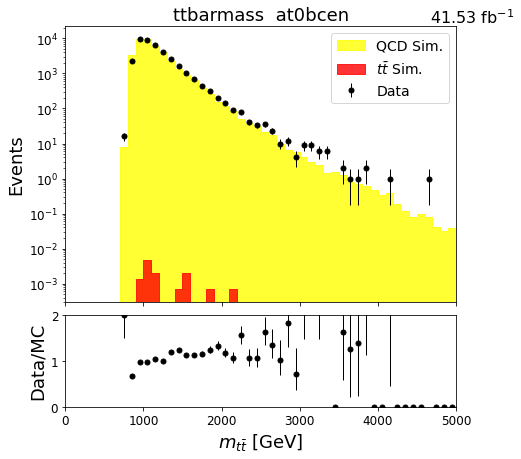

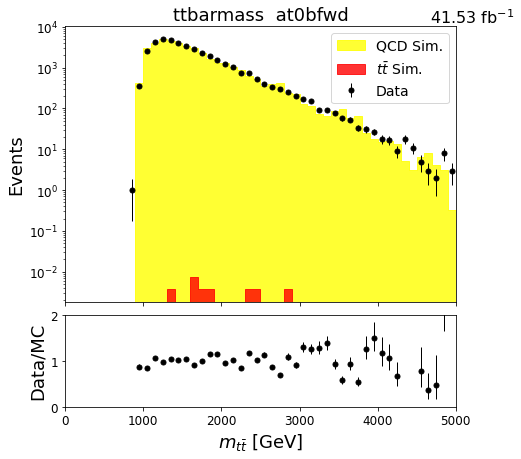

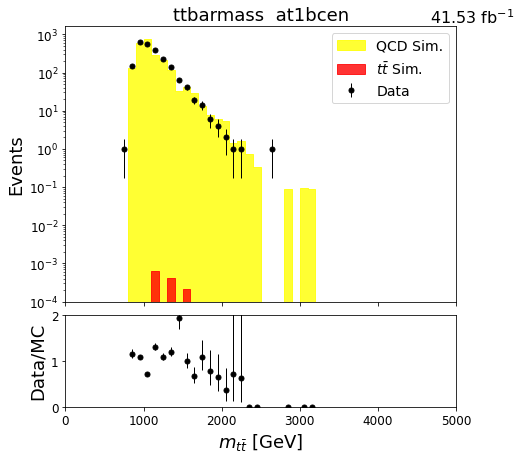

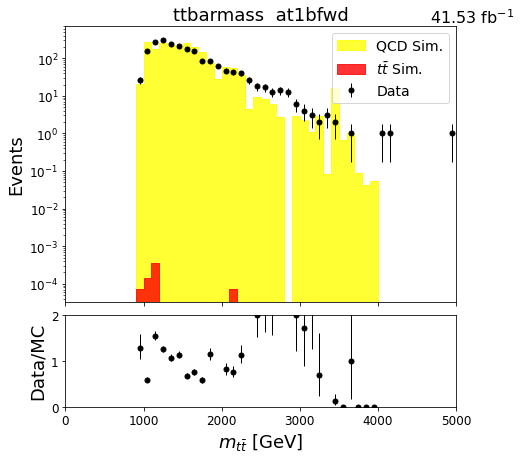

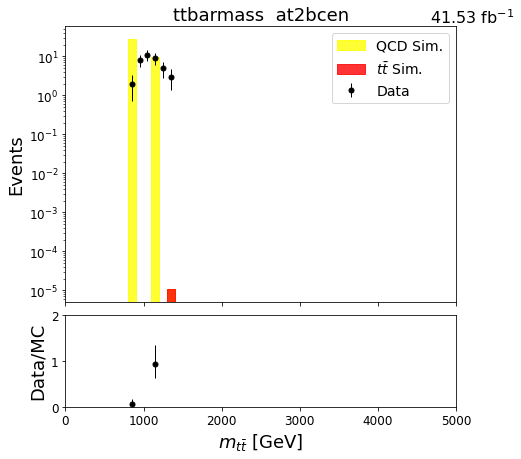

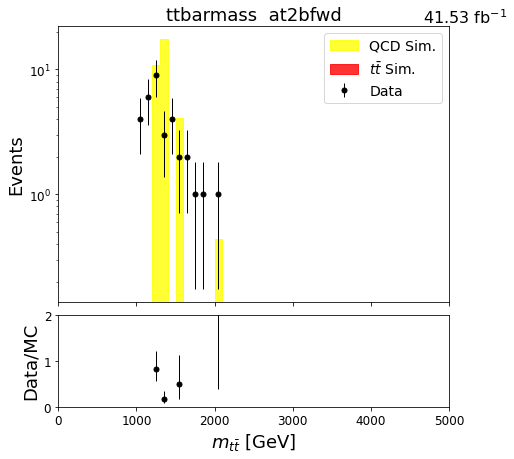

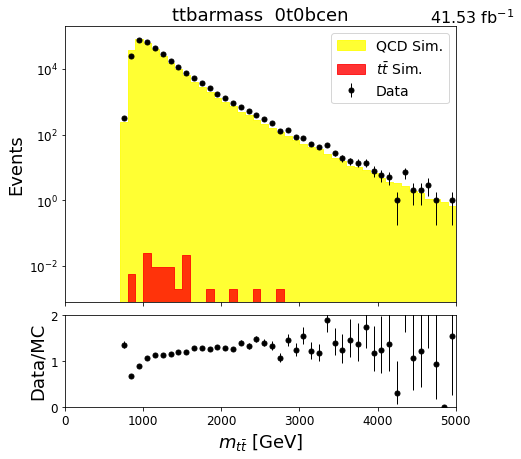

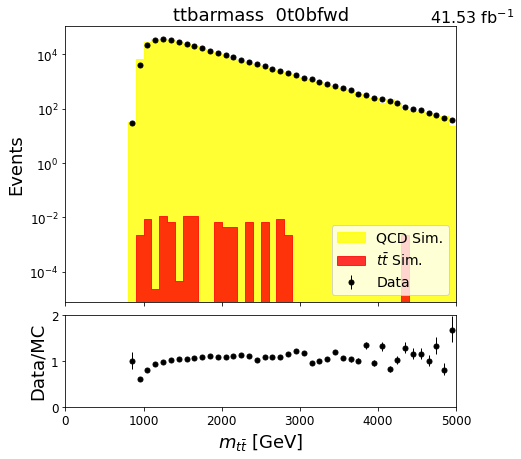

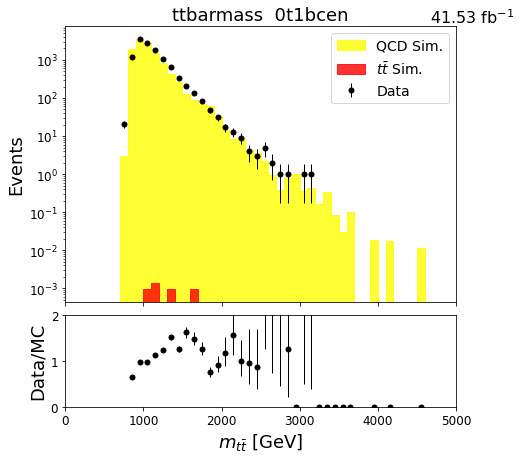

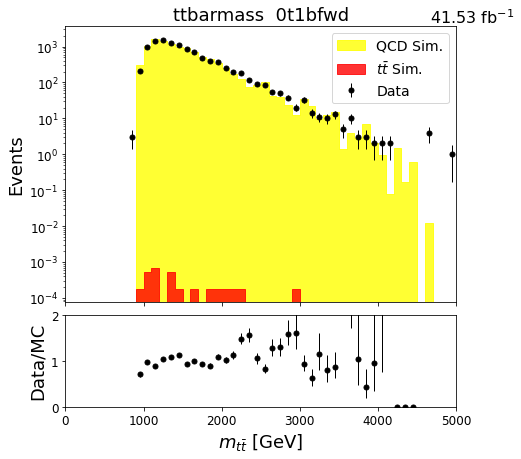

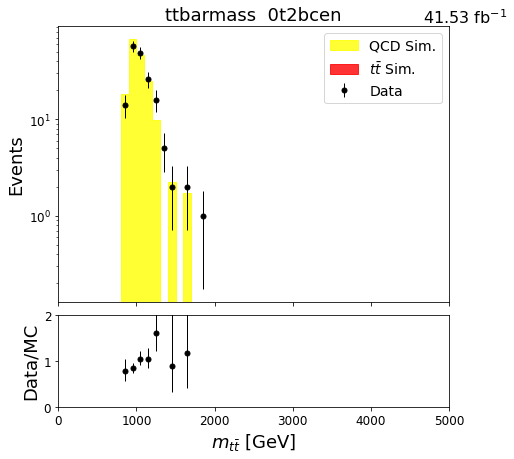

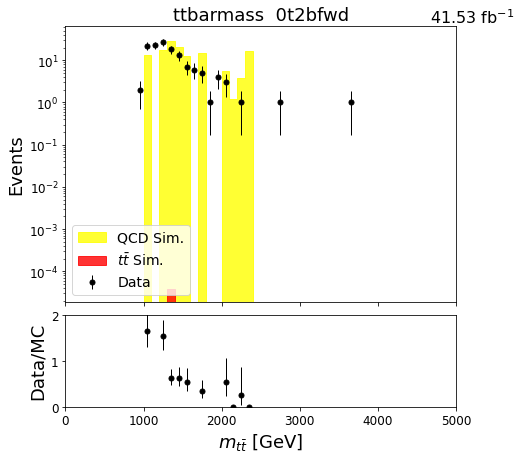

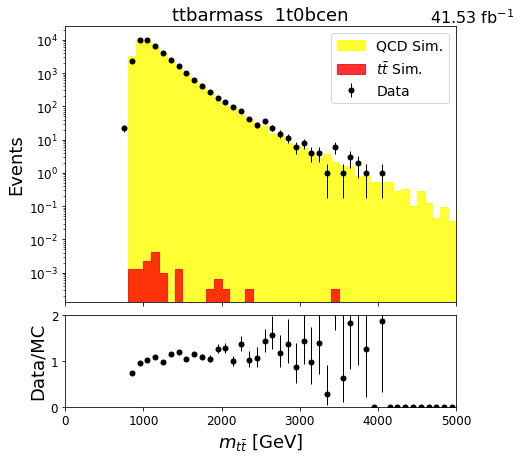

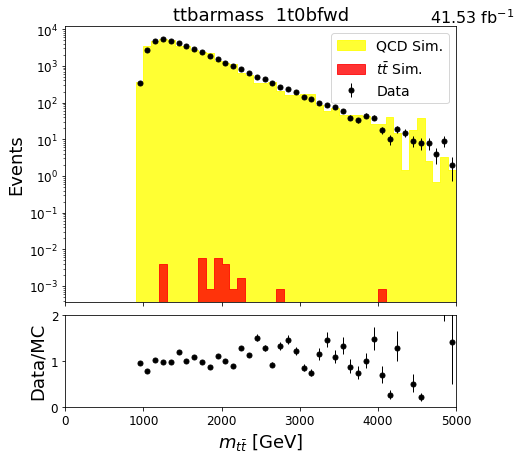

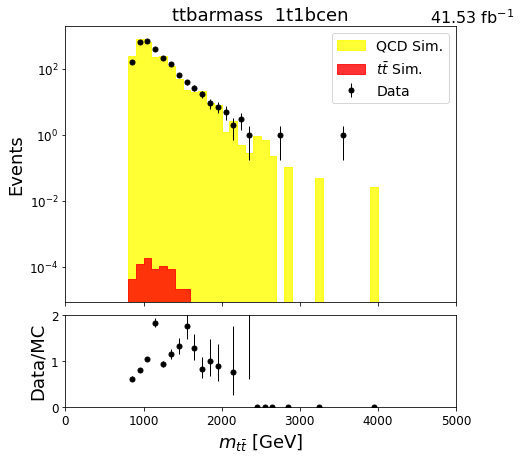

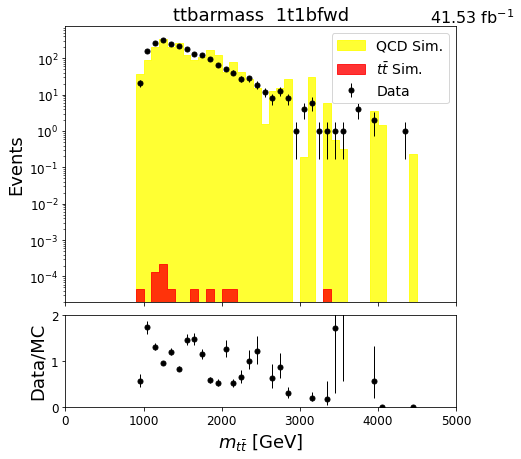

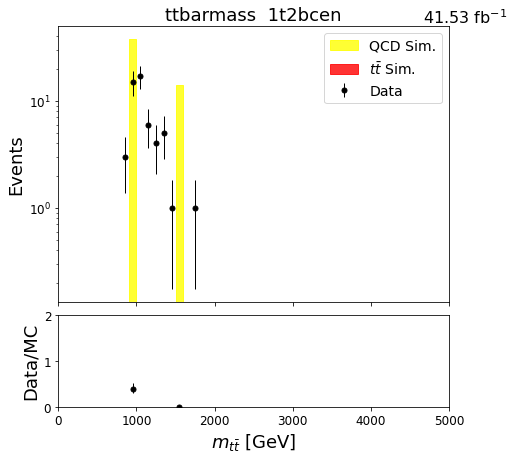

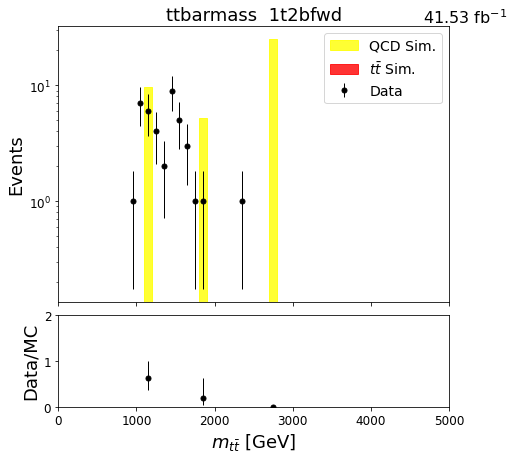

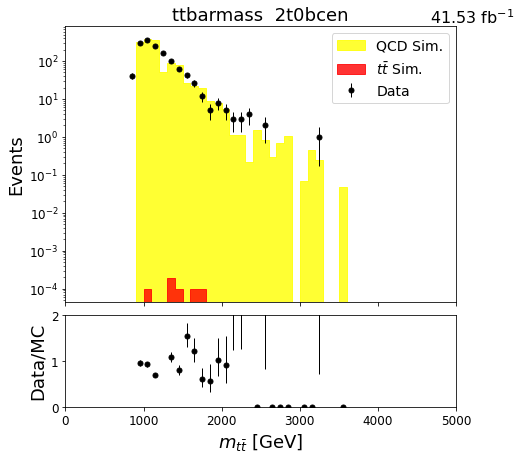

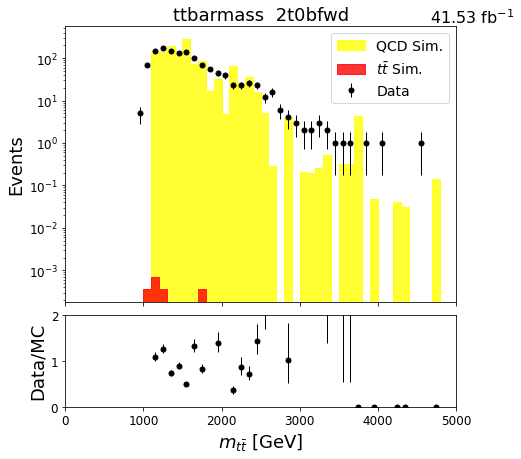

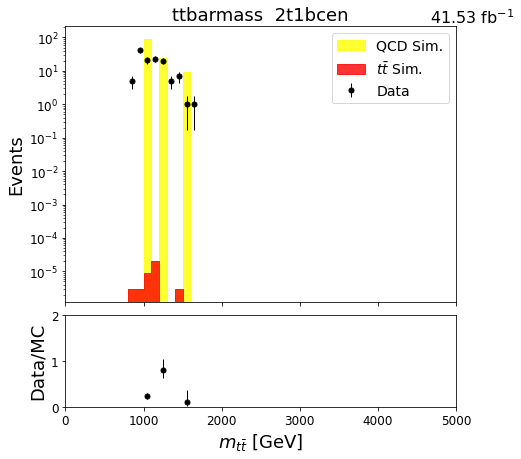

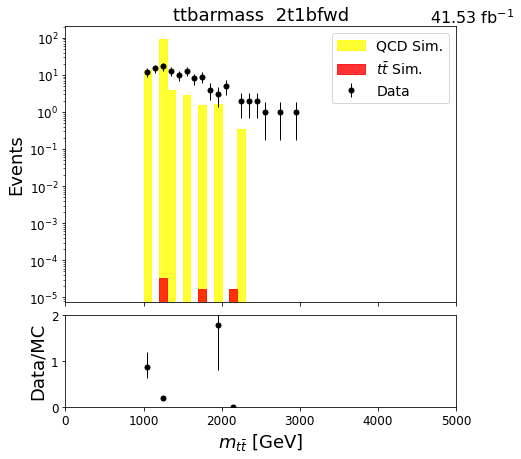

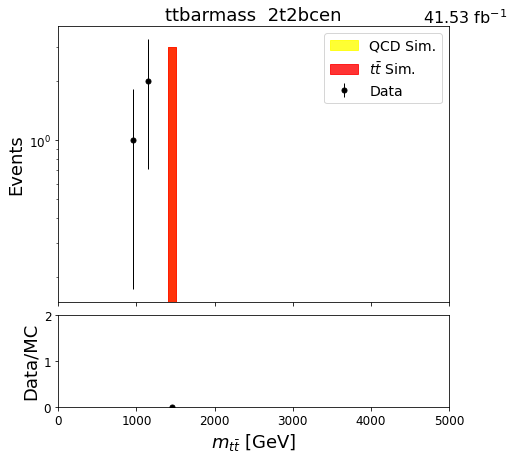

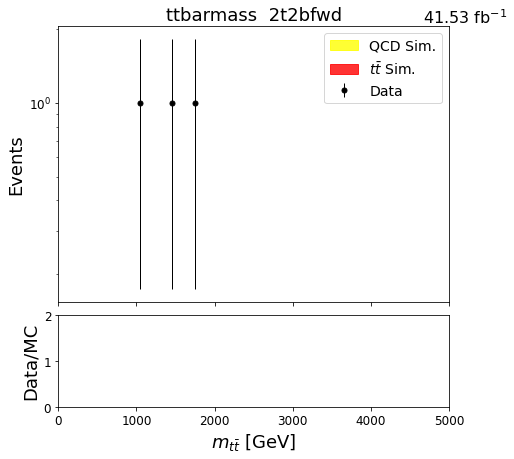

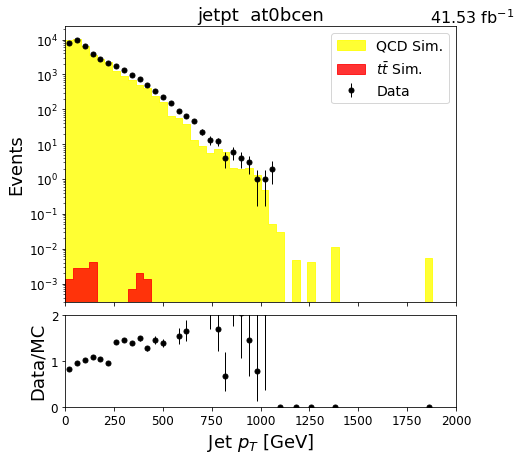

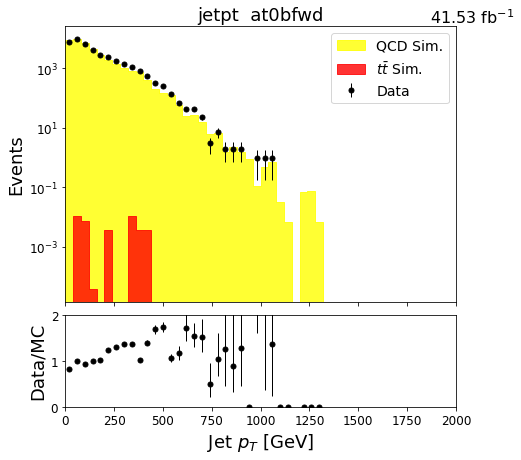

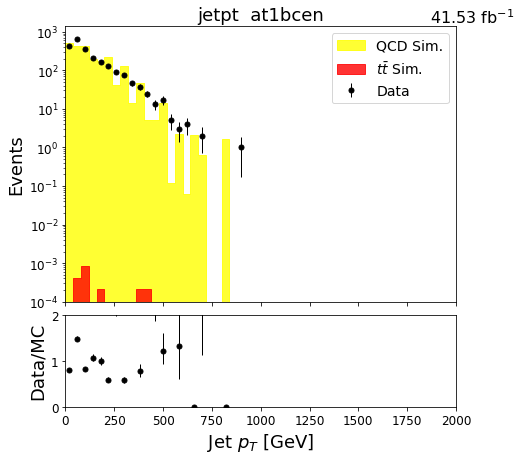

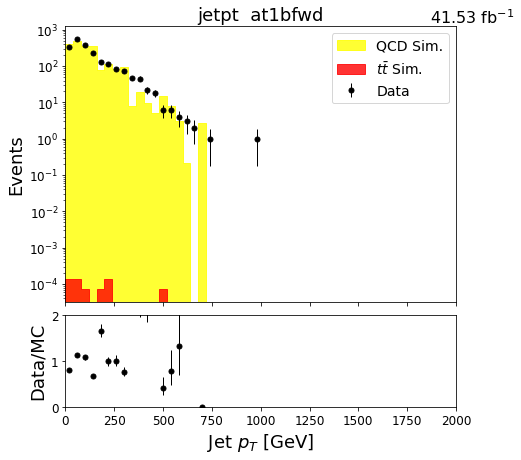

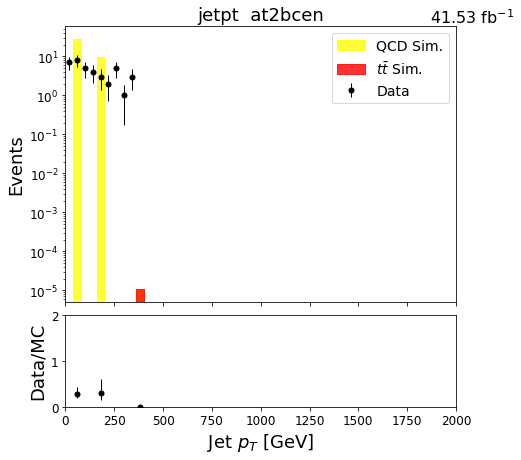

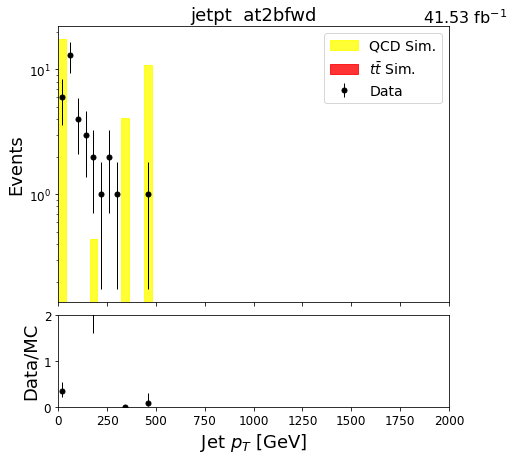

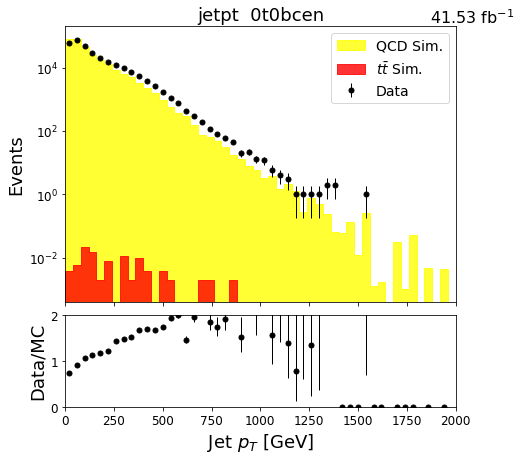

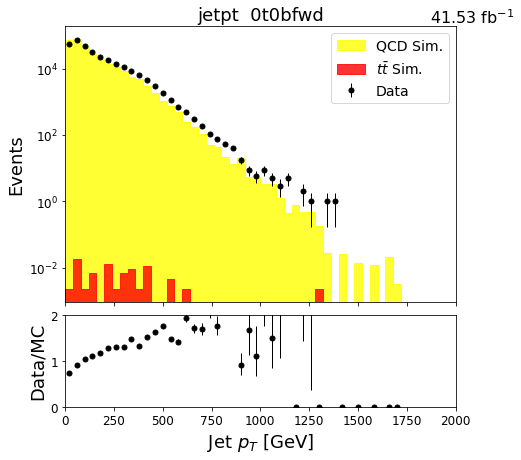

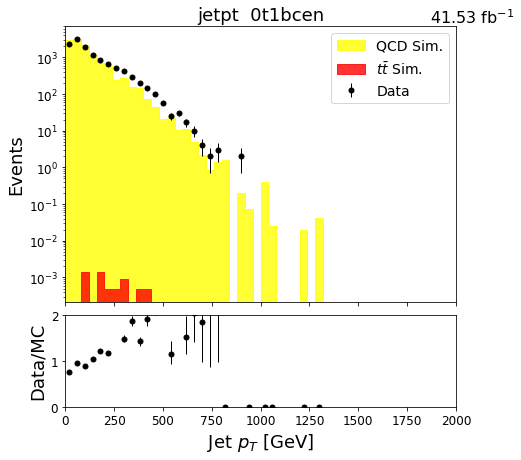

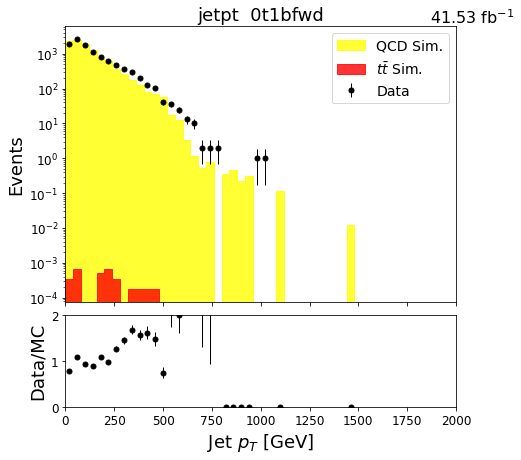

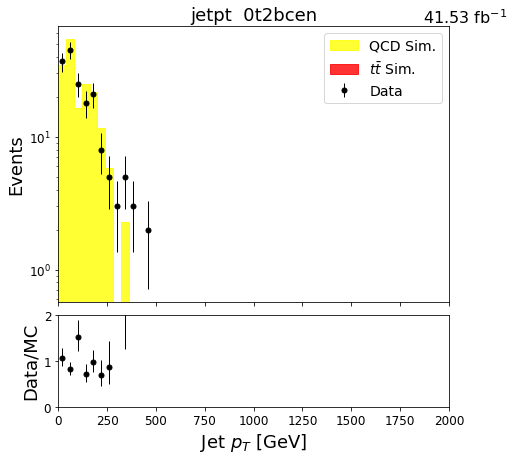

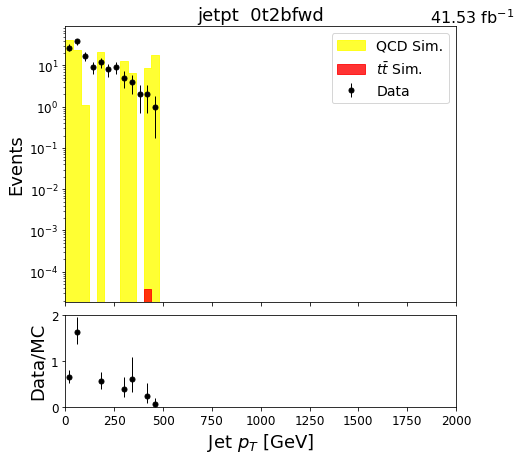

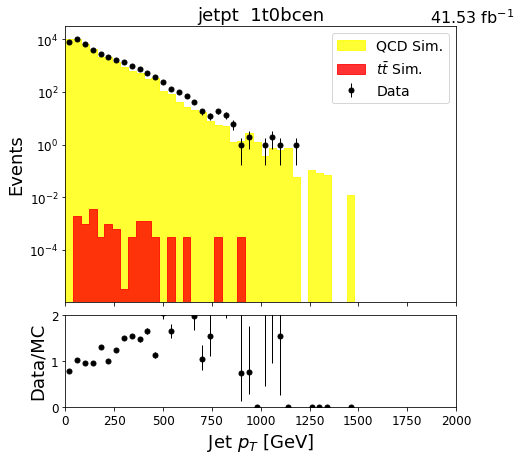

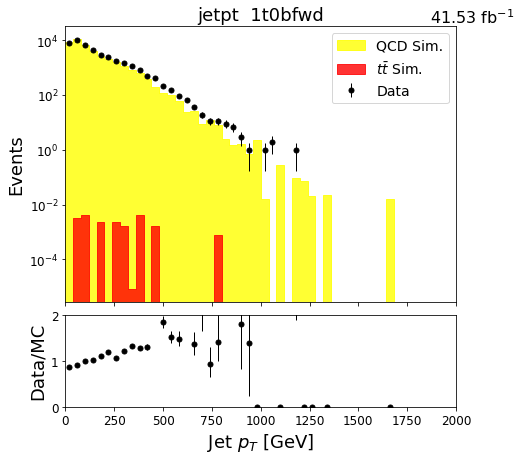

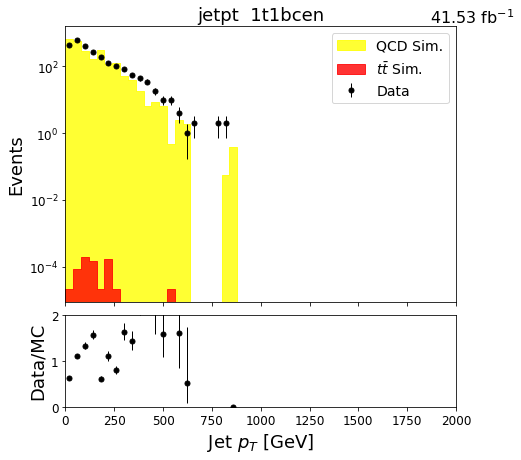

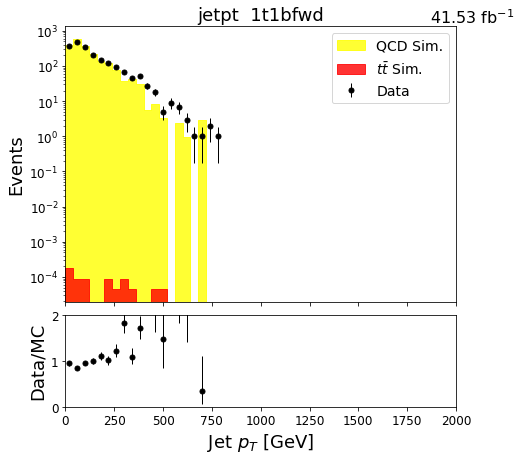

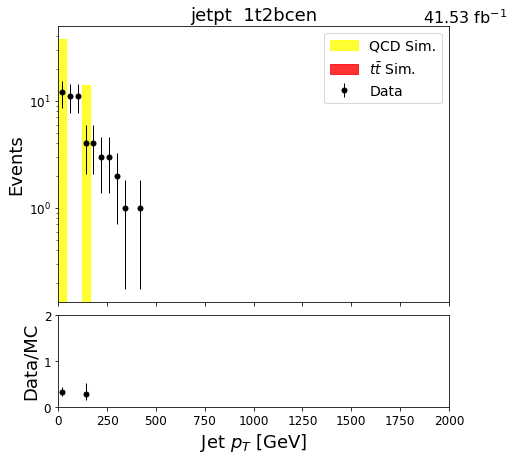

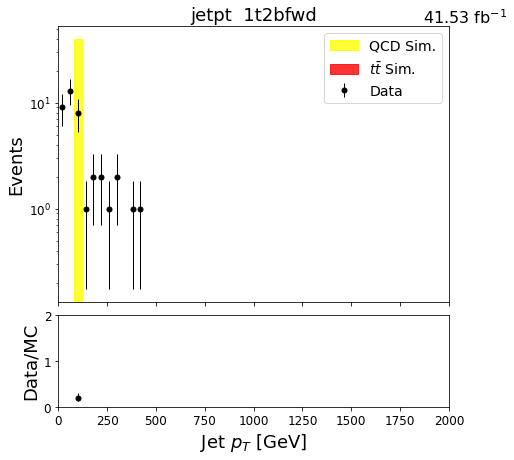

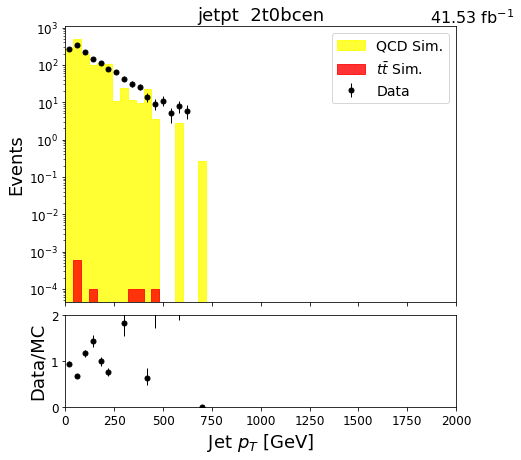

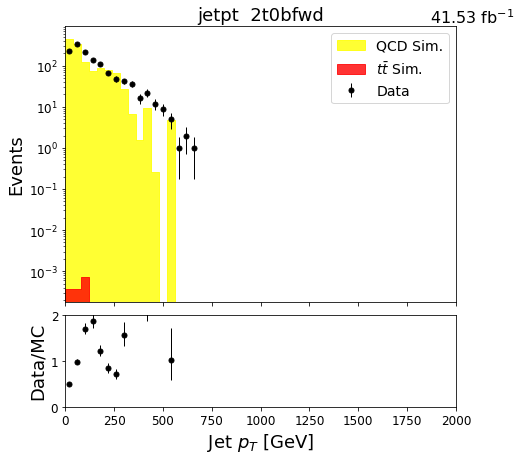

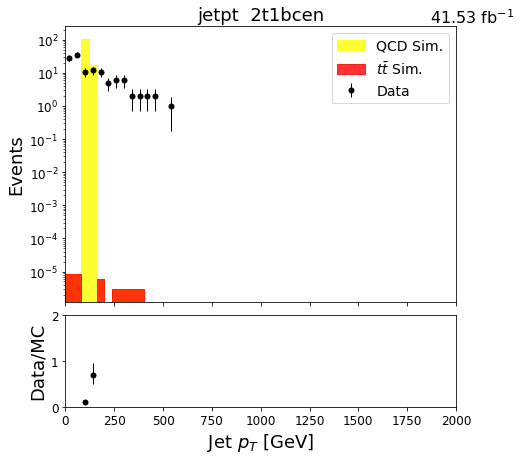

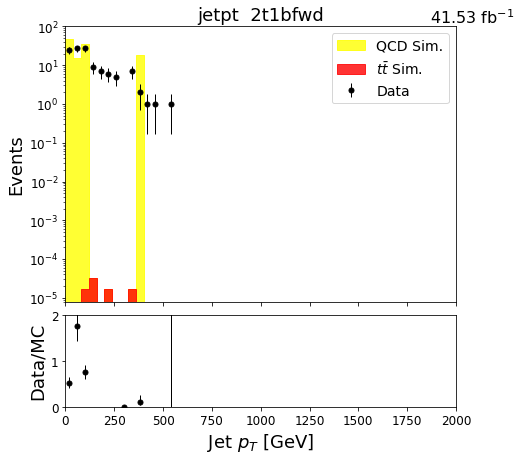

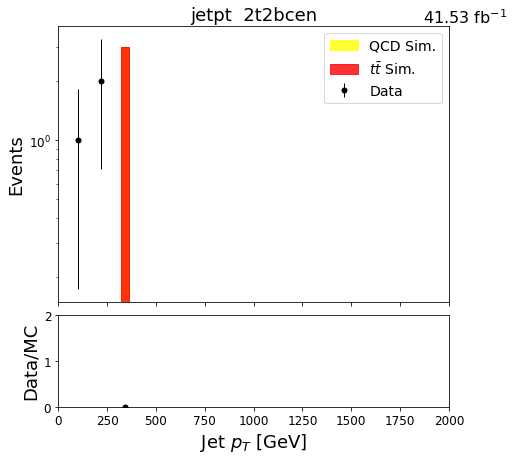

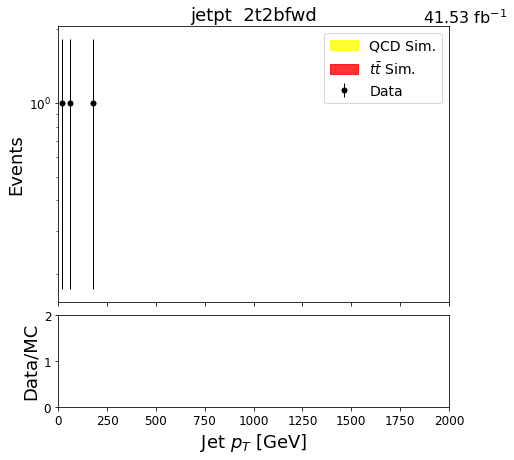

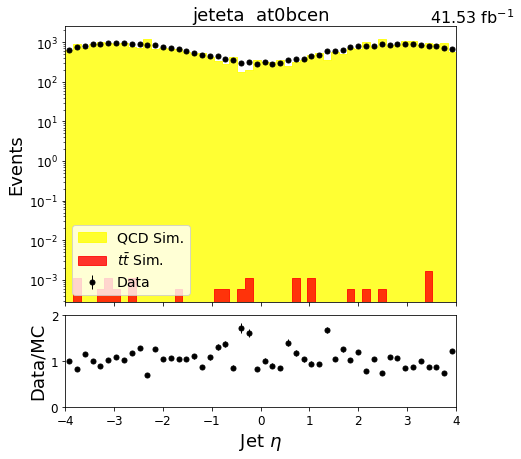

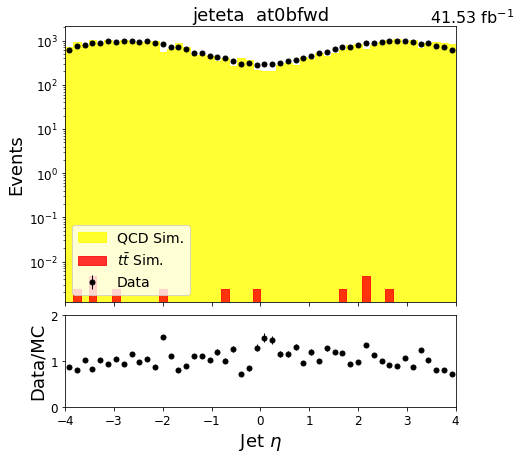

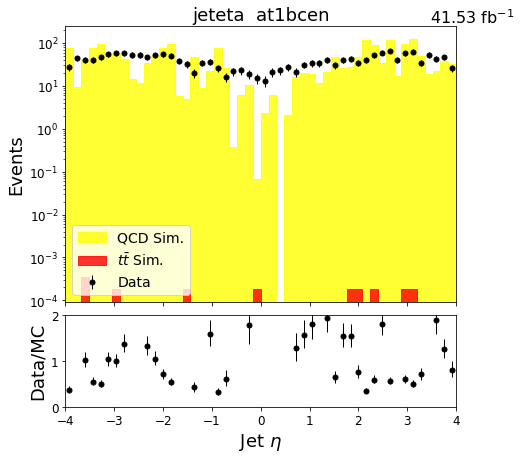

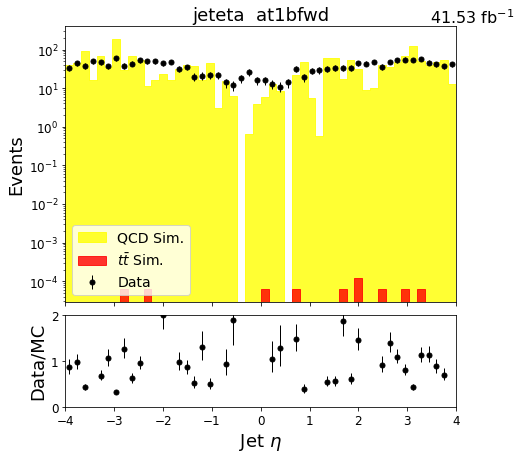

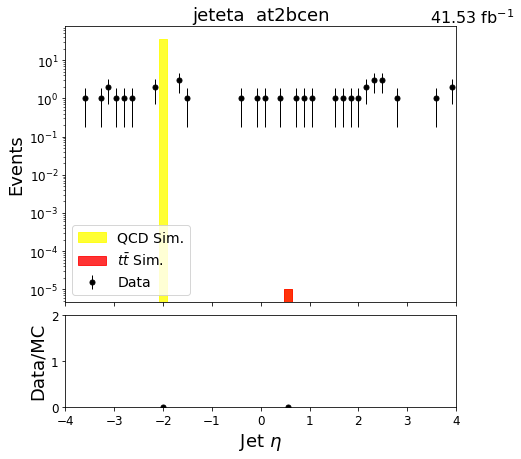

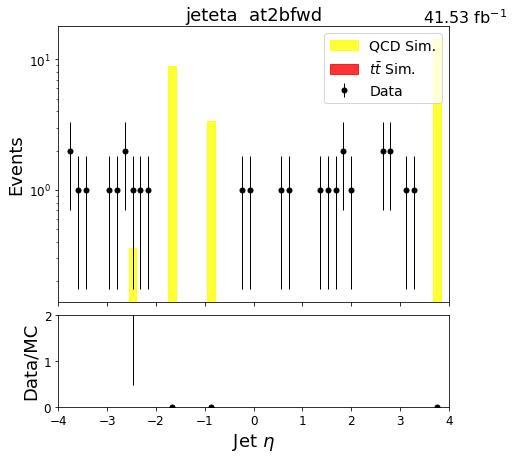

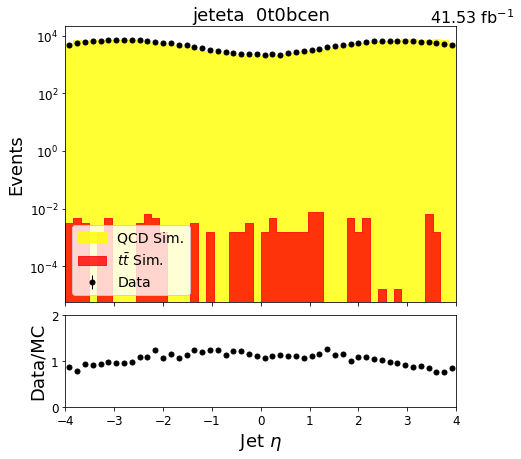

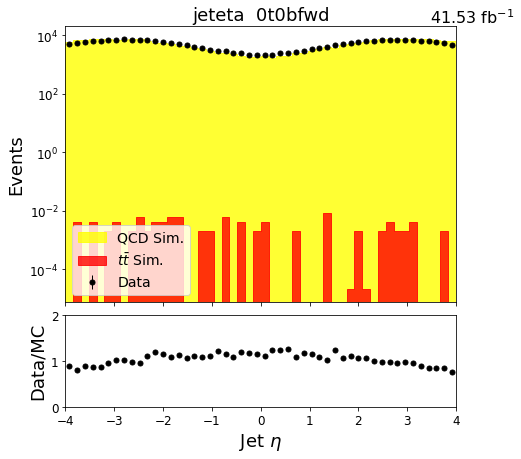

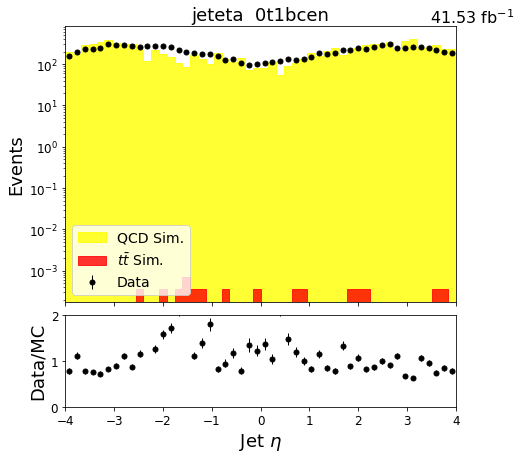

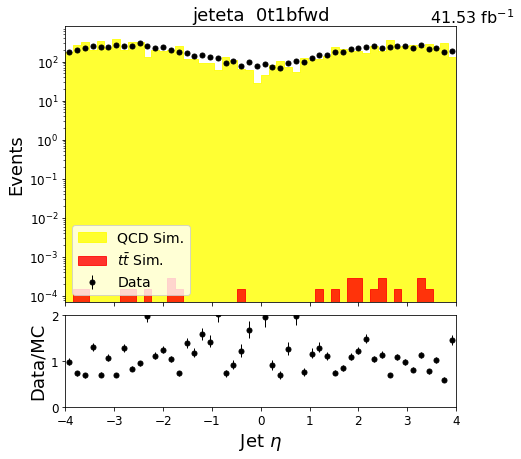

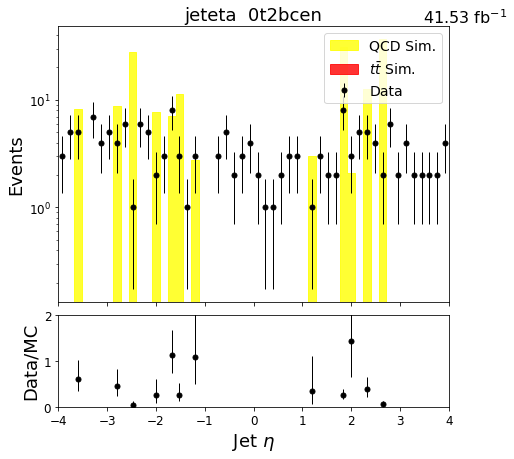

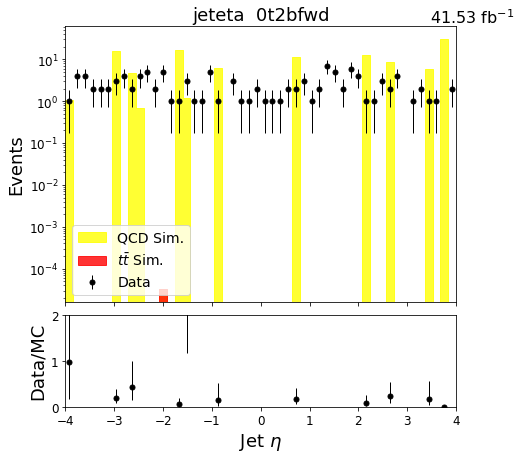

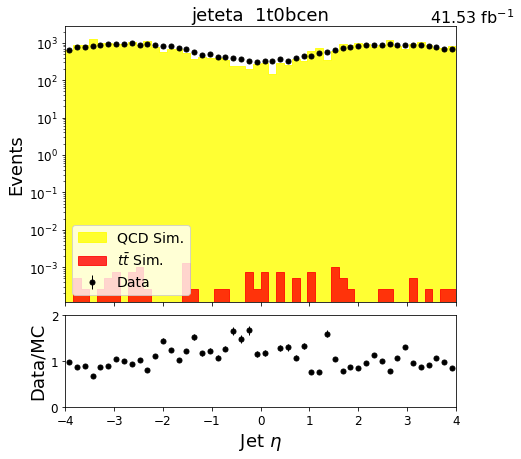

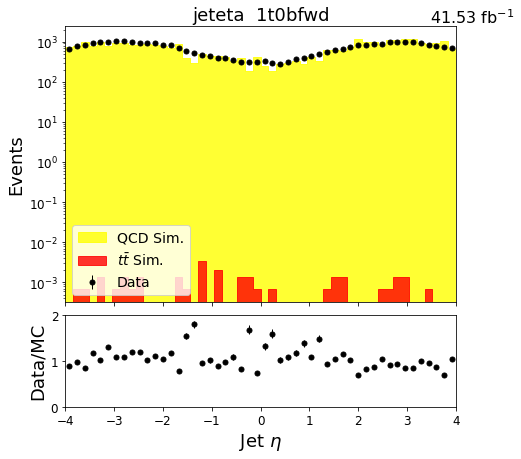

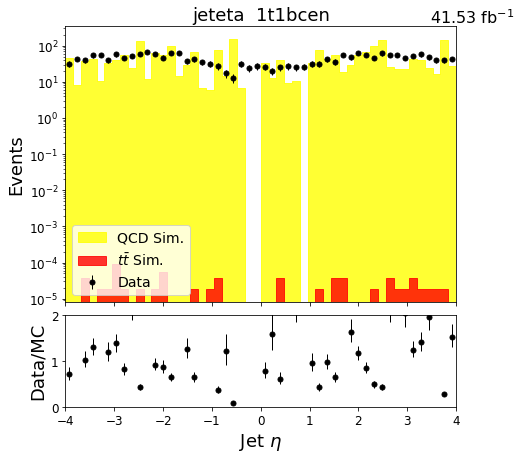

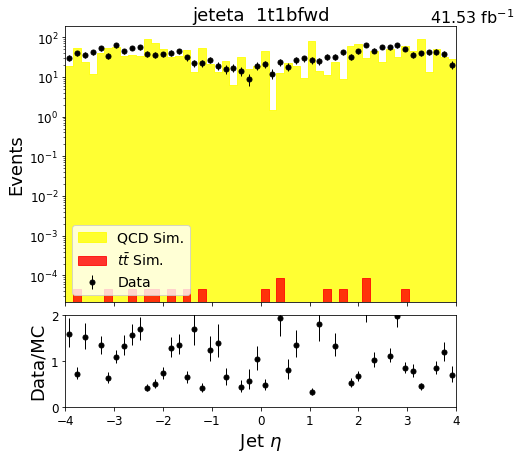

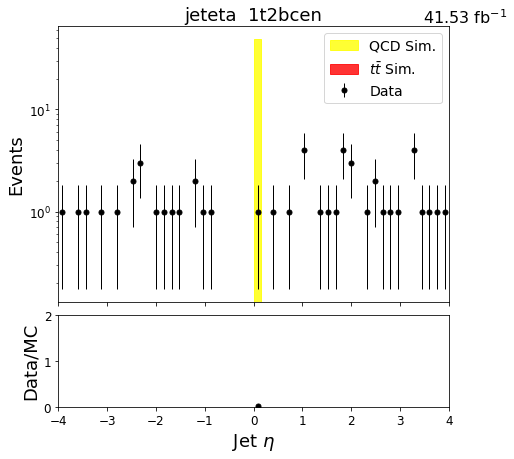

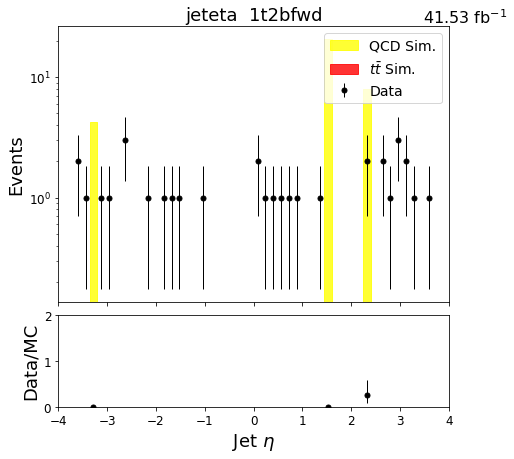

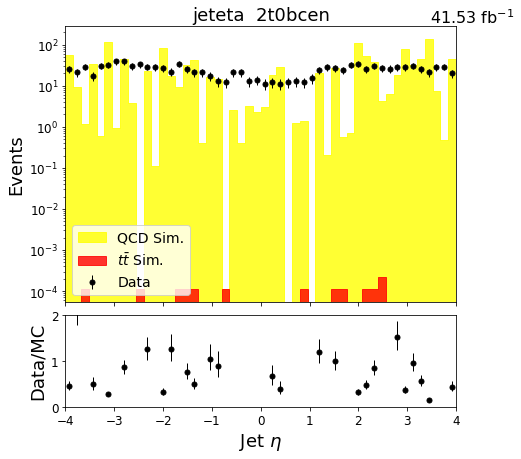

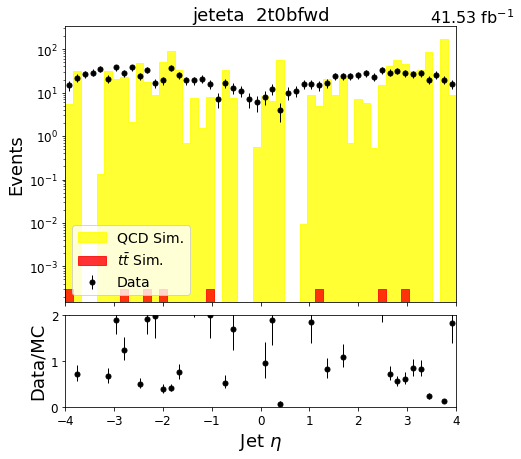

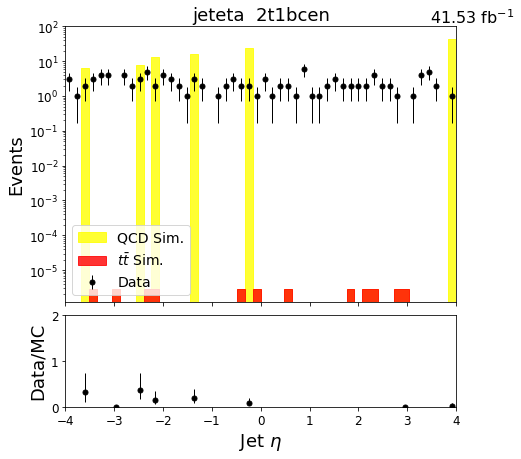

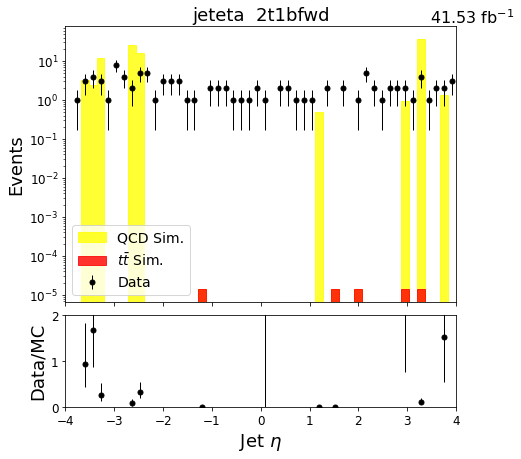

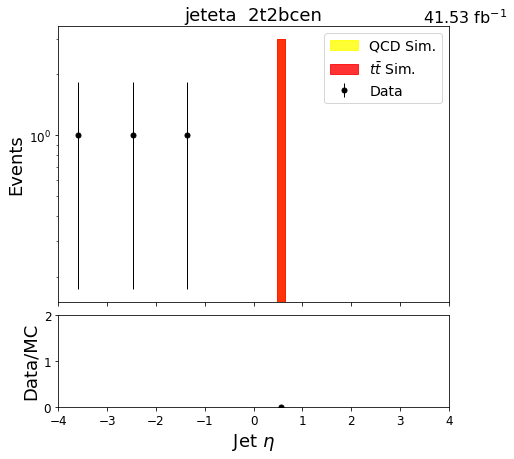

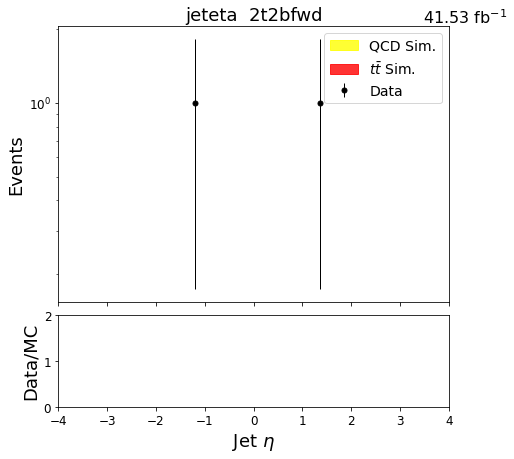

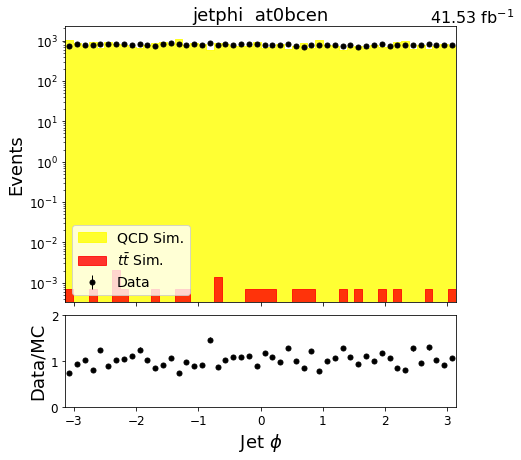

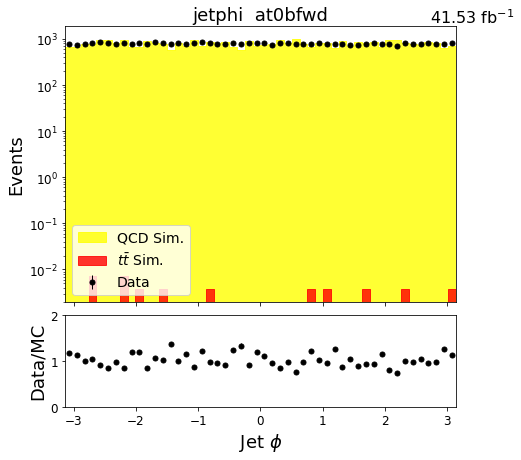

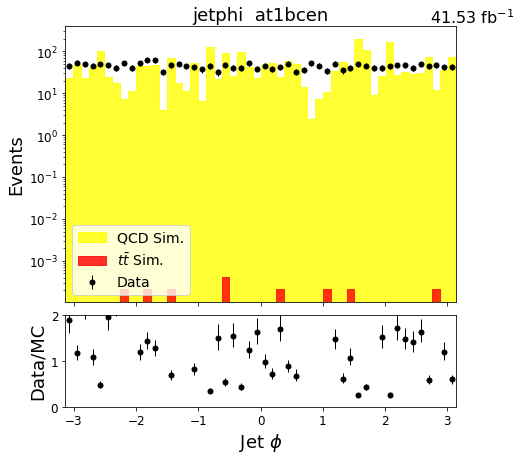

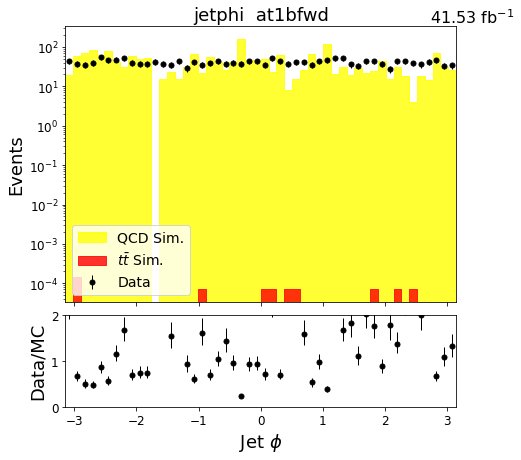

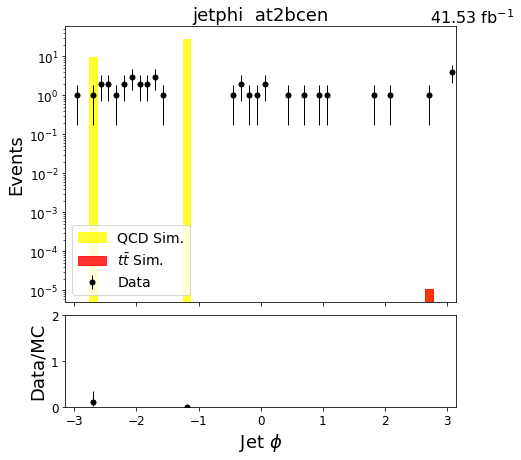

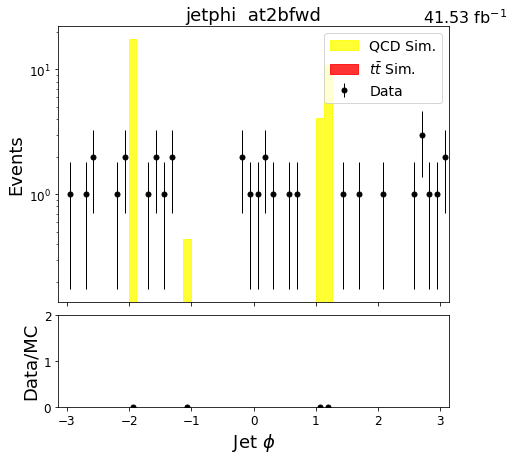

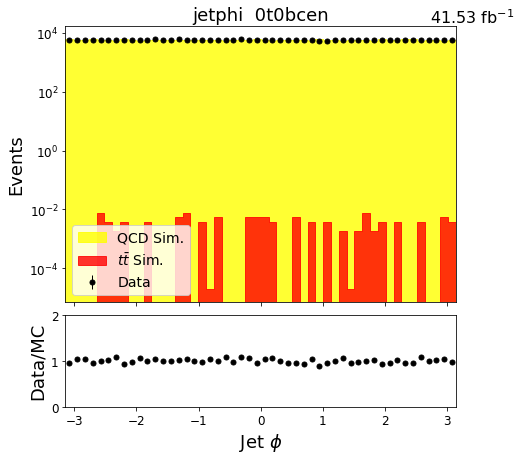

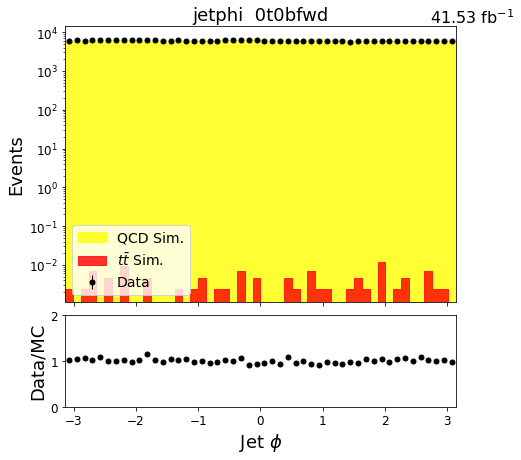

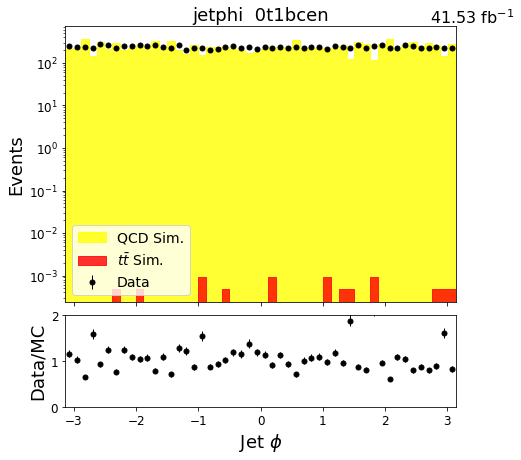

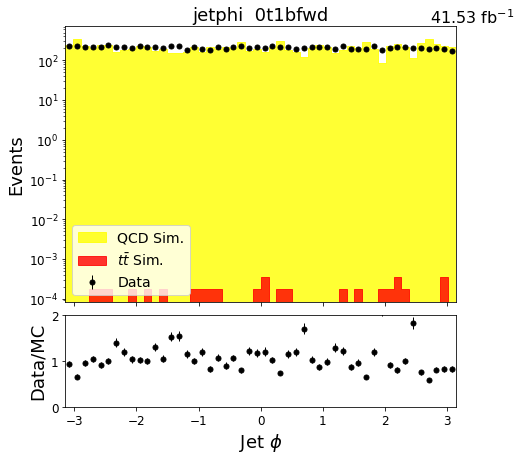

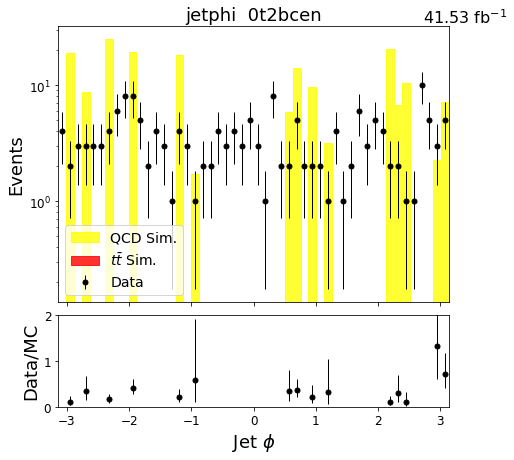

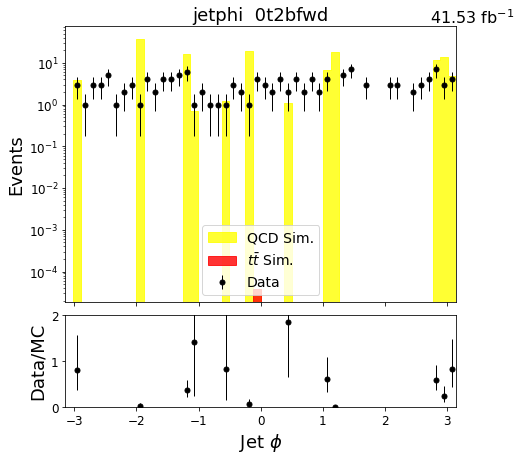

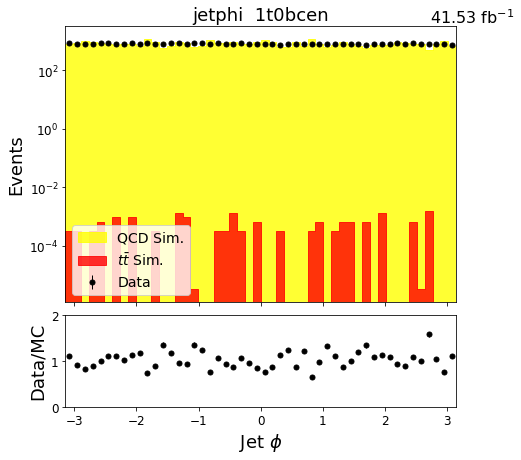

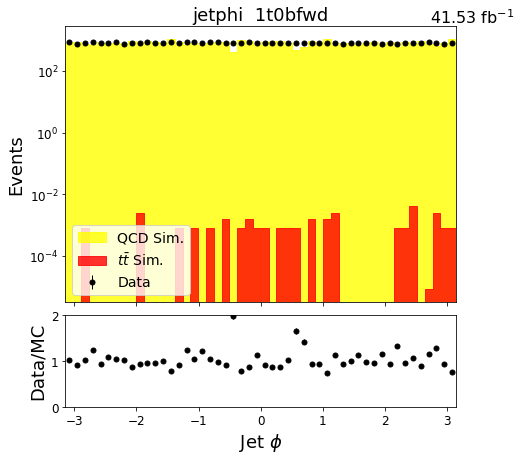

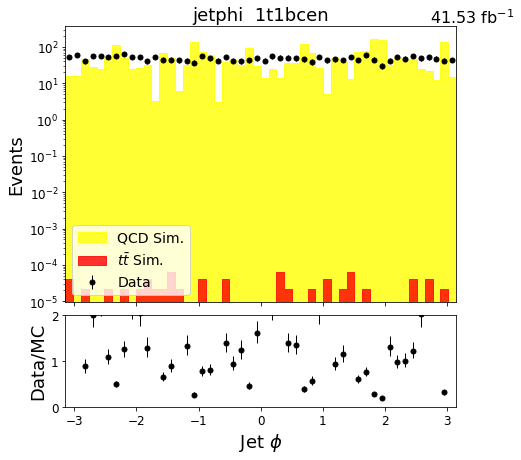

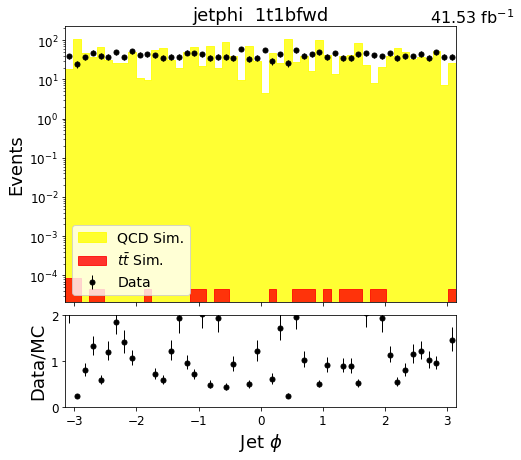

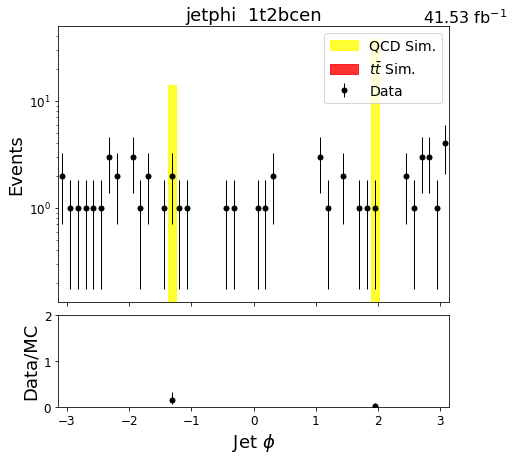

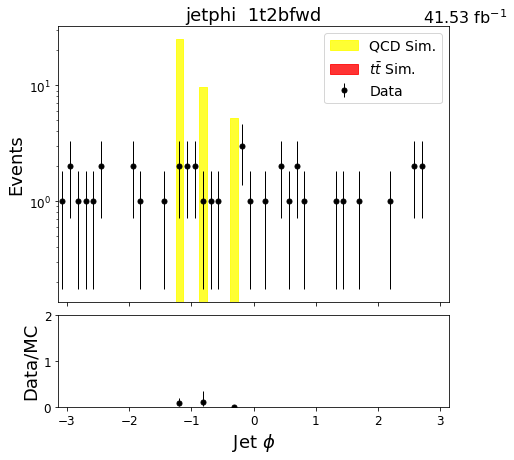

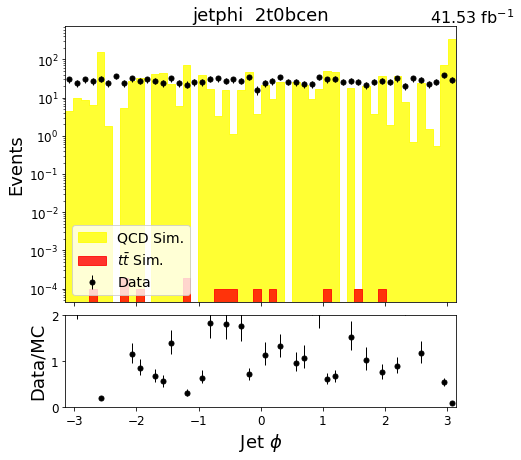

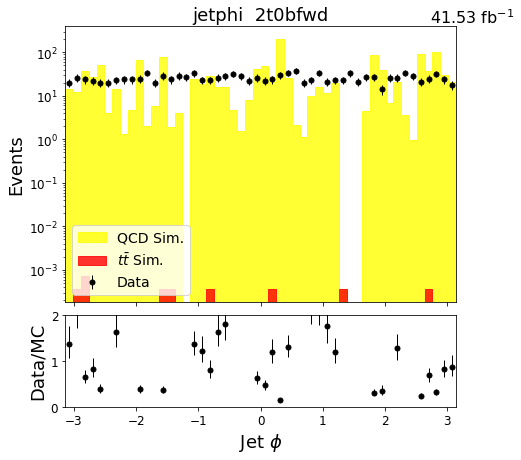

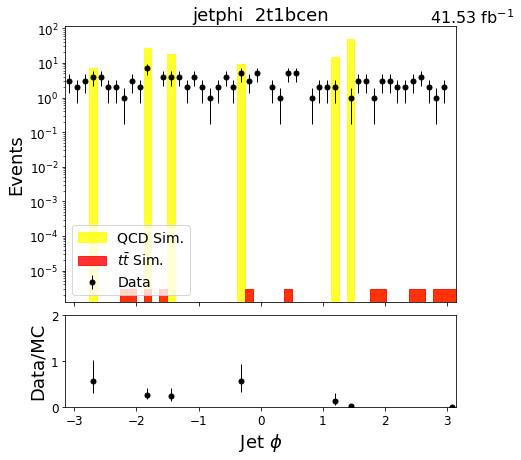

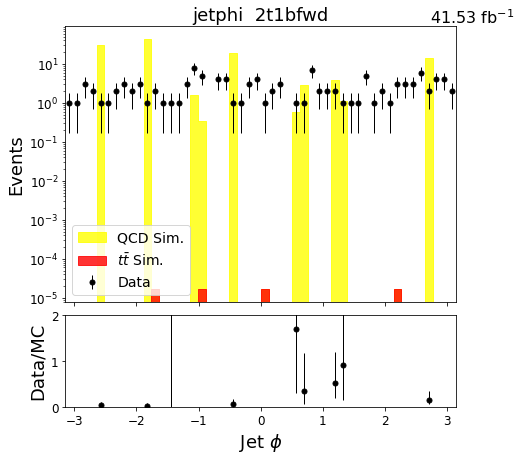

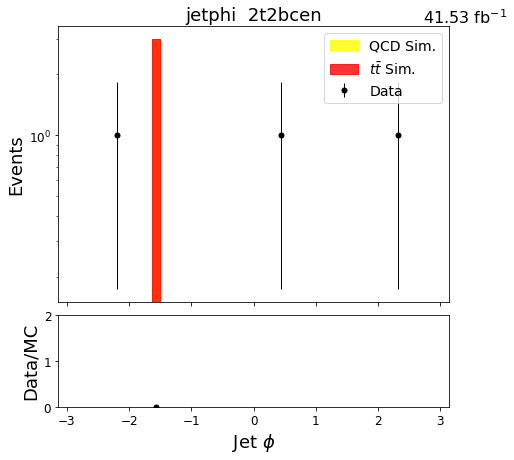

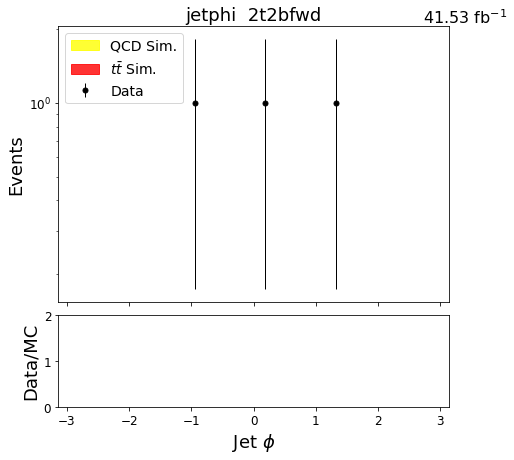

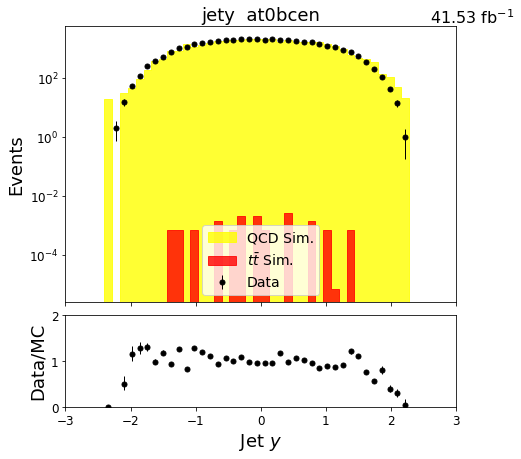

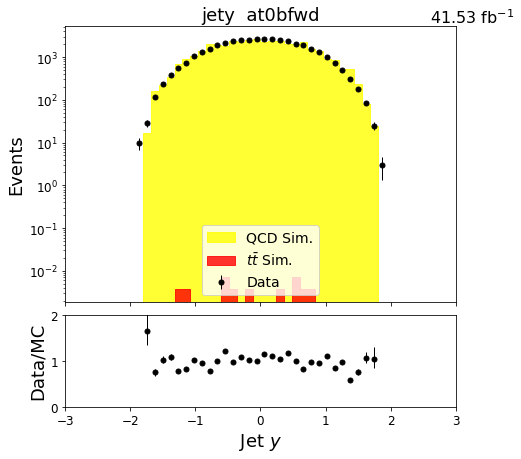

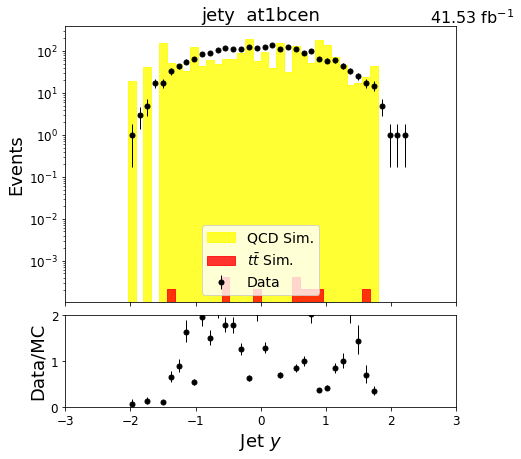

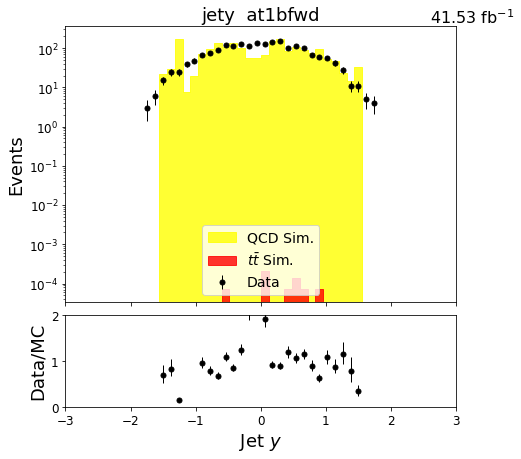

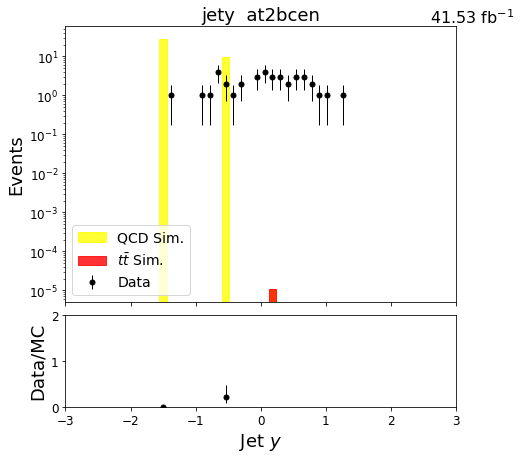

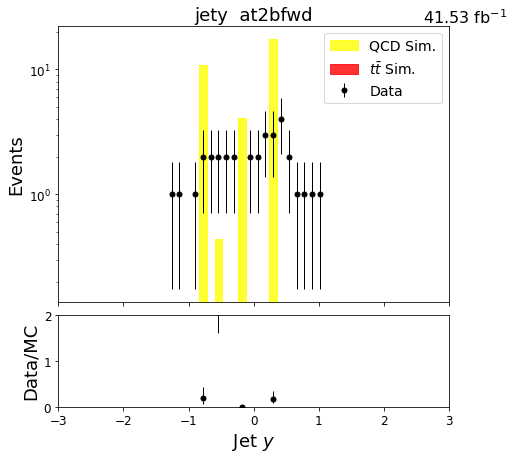

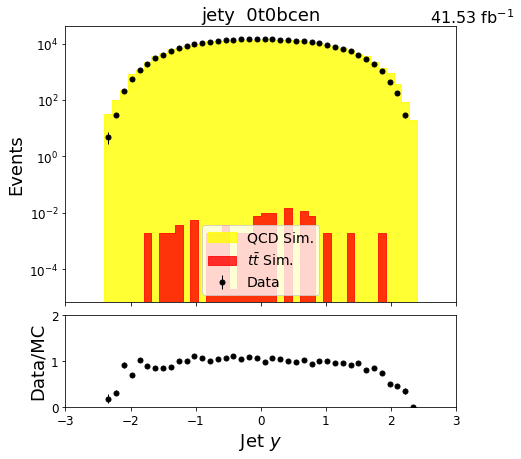

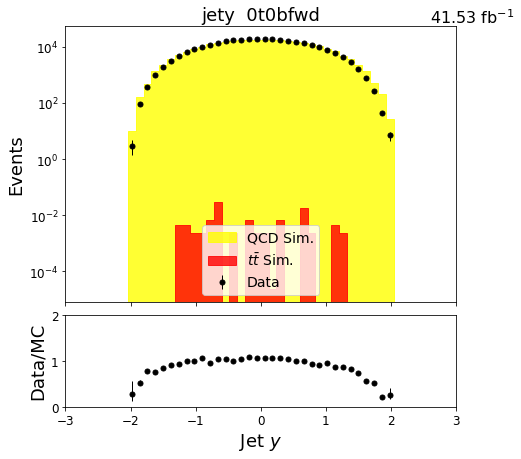

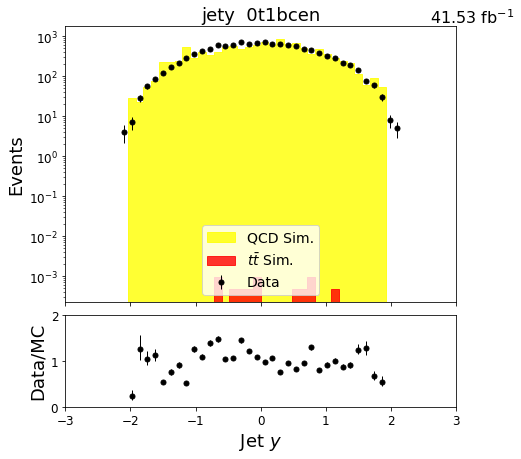

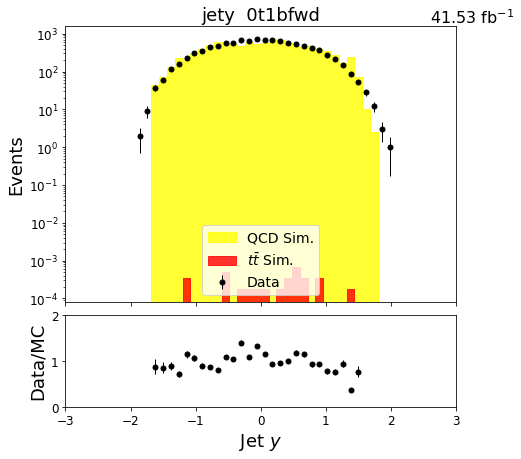

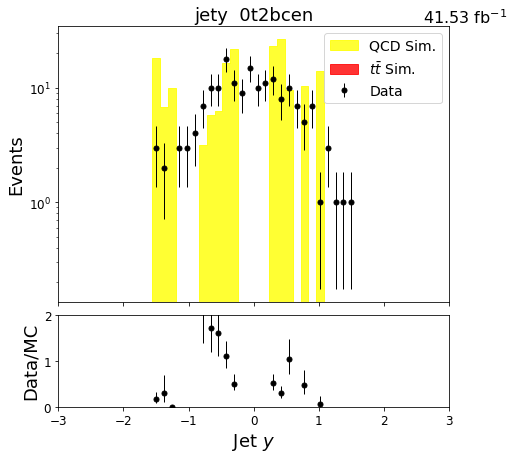

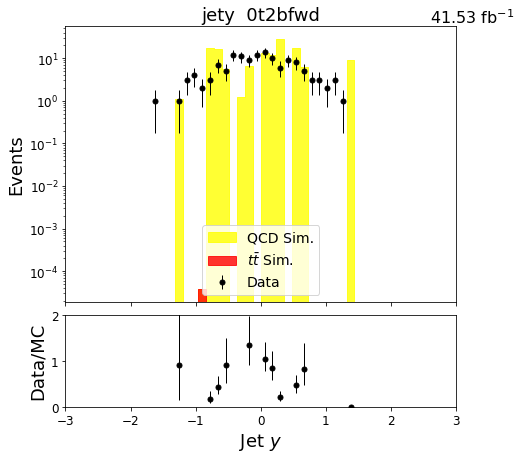

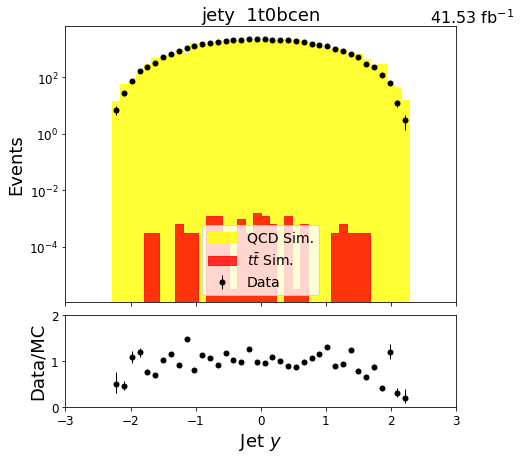

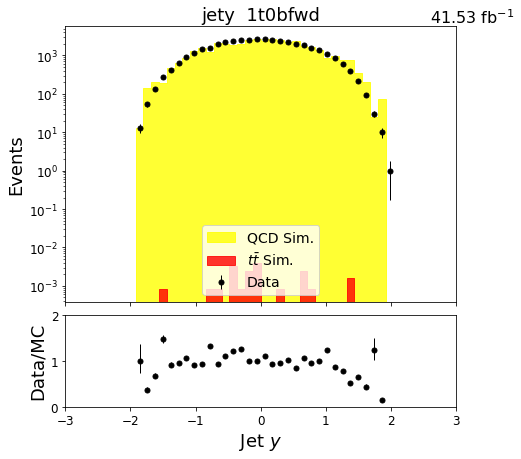

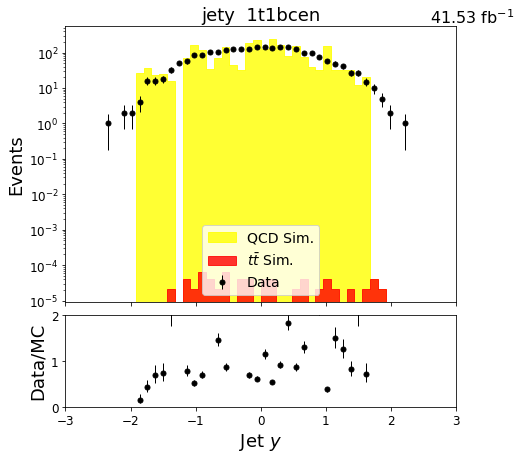

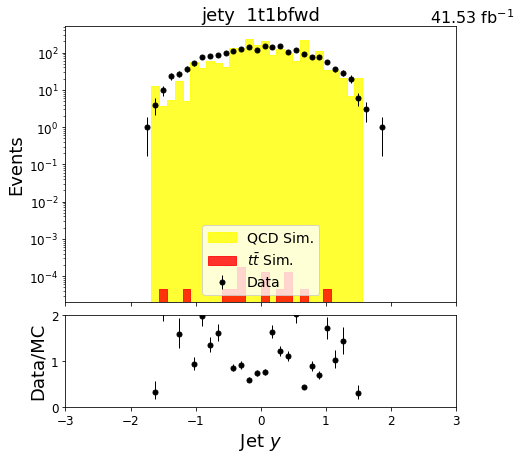

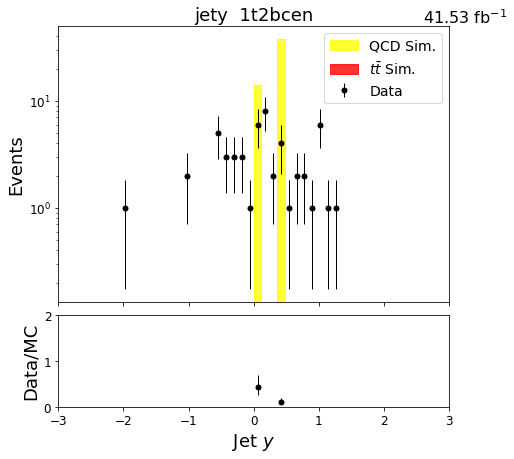

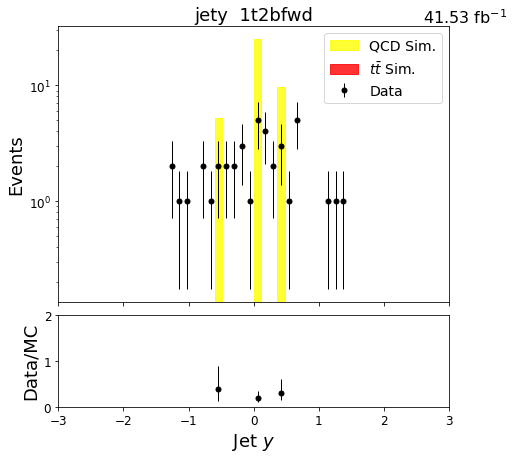

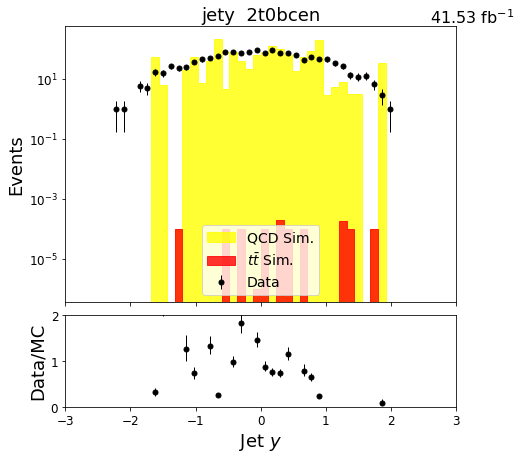

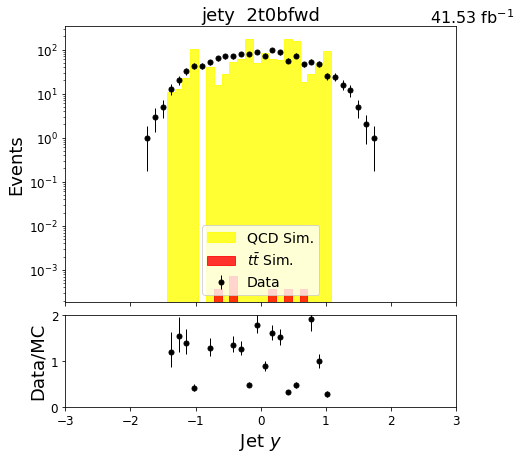

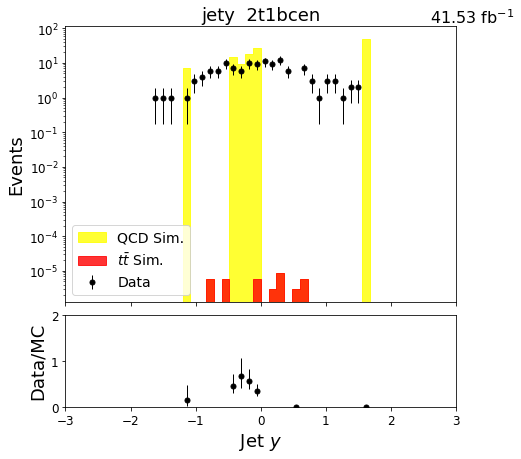

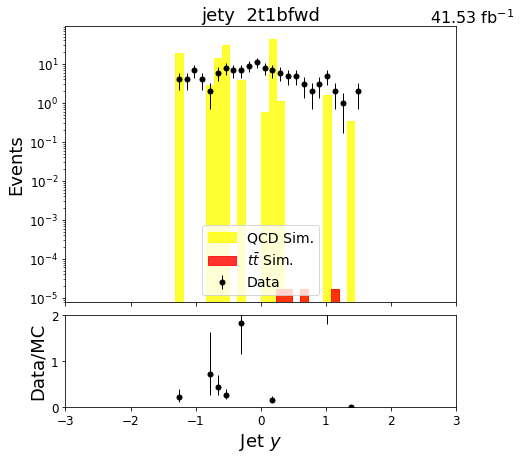

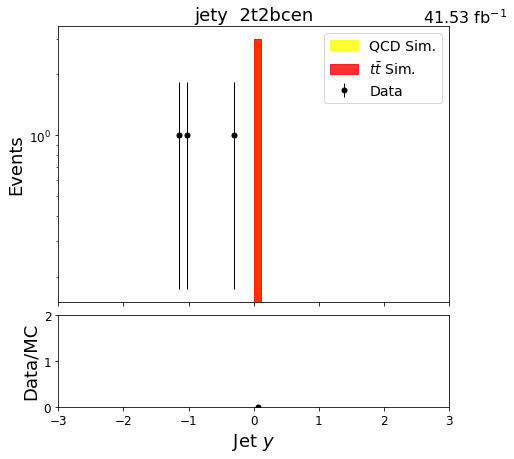

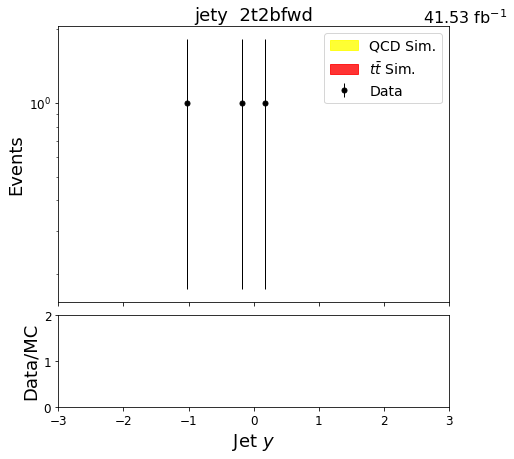

In [14]:
""" ---------------- Unweighted Data and Unweighted MC Plots (No Mistag Rates Included) ---------------- """

for ihist in list_of_hists:
    SaveDirectory = maindirectory + '/' + ihist + '/' # split histograms into subdirectories
    DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
    for icat in list_of_cats: 
        plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })
        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(7,7),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True
        )
        fig.subplots_adjust(hspace=.07)
        title = ihist + '  ' + icat
        filename = ihist + '_' + icat + '.' + 'png'
        
        #---- Define Histograms by category and scale the Total----# 
        
        # ---- Start with TTbar MC ---- #
        TTbar_hist = TTbar_unweighted[ihist].integrate('anacat', icat).integrate('dataset', 'TTbar')
        MC_hist = TTbar_hist.copy() # starting histogram
        Ntt = np.sum(MC_hist.integrate(ihist).values()) # extract number of events from histogram directly
        Ntt = [i for i in Ntt.values()] # the zeroth column entry is the number of events defined as a float
        if Ntt[0] > 0.:
            MC_hist.scale(ttbar_xs/Ntt[0]) # Normalized to ttbar xs
        else:
            MC_hist.scale(0.)
        
        # ---- Repeat above procedure for QCD and add QCD cross section histogram to ttbar xs histogram ---- #
        QCD_hist = QCD_unweighted[ihist].integrate('anacat', icat).integrate('dataset', 'QCD')
        Nqcd = np.sum(QCD_hist.integrate(ihist).values())
        Nqcd = [j for j in Nqcd.values()]
        if Nqcd[0] > 0.:
            QCD_hist.scale(qcd_xs/Nqcd[0]) # Normalized to qcd xs
        else:
            QCD_hist.scale(0.)
            
        MC_hist.add(QCD_hist) # Add Normalized MC Histograms to get Total MC
        
        # ---- Define the data histogram ---- #
        Data_hist = JetHT_unweighted[ihist].integrate('anacat', icat).integrate('dataset', 'JetHT')
        
        # ---- Extract data events and total cross section from histograms ---- #
        NtotalMC = np.sum(MC_hist.integrate(ihist).values())
        NtotalMC = [k for k in NtotalMC.values()]
        
        NtotalData = np.sum(Data_hist.integrate(ihist).values())
        NtotalData = [l for l in NtotalData.values()]
        
        # ---- Normalize the total cross section histogram to the data ---- #
        if NtotalMC[0] > 0.:
            MC_hist.scale(NtotalData[0]/NtotalMC[0])
        else:
            MC_hist.scale(0.)
            
        #NtotalMC_scaled = np.sum(MC_hist.integrate(ihist).values())
        #print('QCD ' + filename + ' ', NtotalMC_scaled)
        
        #---- Plot Total MC ----#
        #-----------------------------------------------------------------#
        hist.plot1d(MC_hist, ax=ax, clear=False,
                    fill_opts=stack_background_opts, error_opts=stack_error_opts)
        
        if Ntt[0] > 0:
            TTbar_hist.scale((NtotalData[0]/NtotalMC[0])*(ttbar_xs/Ntt[0]))
        else:
            TTbar_hist.scale(0.)
        #NTTbar_scaled = np.sum(TTbar_hist.integrate(ihist).values())
        #print('TTbar' + filename + ' ', NTTbar_scaled)
            
        #---- Plot TTbar MC ---- #
        #-----------------------------------------------------------------#
        hist.plot1d(TTbar_hist, ax=ax, clear=False,
                    fill_opts=stack_ttbar_opts, error_opts=stack_error_opts)
        
        #print('Data' + filename + ' ', NtotalData)
        #---- Plot Data ----#
        #-----------------------------------------------------------------#
        hist.plot1d(Data_hist, ax=ax, clear=False, 
                    error_opts=data_err_opts)
        
        ax.set_yscale('log')
        ax.autoscale('y')
        ax.autoscale('x')#, tight=True) # doesn't look like its working...
        ax.set_ylabel('Events')
        ax.set_xlabel(None)
        ax.set_title(title)
        leg = ax.legend(labels=["QCD Sim.", r'$t\bar{t}$ Sim.', 'Data'])
        
        #---- Plot Ratio ----#
        hist.plotratio(num = Data_hist, denom = MC_hist, ax = rax,
                       error_opts={'marker': '.', 'markersize': 10., 'color': 'k', 'elinewidth': 1},
                       unc = 'num')
        rax.set_ylabel('Data/MC')
        rax.set_ylim(0,2)
       
        #---- Labeling ----#
        Lint = str(Lum*.001) # Integrated Luminosity
        lumi = plt.text(1.15, 1.07, Lint[:6] + " fb$^{-1}$",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )
        plt.savefig(SaveDirectory+filename, bbox_inches="tight")
        print(filename + ' saved')
        #print()
    

In [ ]:
""" ---------------- Weighted Data and Unweighted MC Plots (No Mistag Rates Included) ---------------- """

for ihist in list_of_hists:
    SaveDirectory = maindirectory + '/' + ihist + '/' # split histograms into subdirectories
    DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
    for icat in list_of_cats: 
        plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })
        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(7,7),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True
        )
        fig.subplots_adjust(hspace=.07)
        title = ihist + '  ' + icat
        filename = ihist + '_' + icat + 'weightedData.' + 'png'
        
        #---- Define Histograms by category and scale the Total----# 
        
        # ---- Start with TTbar MC ---- #
        TTbar_hist = TTbar_unweighted[ihist].integrate('anacat', icat).integrate('dataset', 'TTbar')
        MC_hist = TTbar_hist.copy() # starting histogram
        Ntt = np.sum(MC_hist.integrate(ihist).values()) # extract number of events from histogram directly
        Ntt = [i for i in Ntt.values()] # the zeroth column entry is the number of events defined as a float
        if Ntt[0] > 0.:
            MC_hist.scale(ttbar_xs/Ntt[0]) # Normalized to ttbar xs
        else:
            MC_hist.scale(0.)
        
        # ---- Repeat above procedure for QCD and add QCD cross section histogram to ttbar xs histogram ---- #
        QCD_hist = QCD_unweighted[ihist].integrate('anacat', icat).integrate('dataset', 'QCD')
        Nqcd = np.sum(QCD_hist.integrate(ihist).values())
        Nqcd = [j for j in Nqcd.values()]
        if Nqcd[0] > 0.:
            QCD_hist.scale(qcd_xs/Nqcd[0]) # Normalized to qcd xs
        else:
            QCD_hist.scale(0.)
            
        MC_hist.add(QCD_hist) # Add Normalized MC Histograms to get Total MC
        
        # ---- Define the data histogram ---- #
        Data_hist = JetHT_weighted[ihist].integrate('anacat', icat).integrate('dataset', 'JetHT')
        
        # ---- Extract data events and total cross section from histograms ---- #
        NtotalMC = np.sum(MC_hist.integrate(ihist).values())
        NtotalMC = [k for k in NtotalMC.values()]
        
        NtotalData = np.sum(Data_hist.integrate(ihist).values())
        NtotalData = [l for l in NtotalData.values()]
        
        # ---- Normalize the total cross section histogram to the data ---- #
        if NtotalMC[0] > 0.:
            MC_hist.scale(NtotalData[0]/NtotalMC[0])
        else:
            MC_hist.scale(0.)
            
        #NtotalMC_scaled = np.sum(MC_hist.integrate(ihist).values())
        #print('QCD ' + filename + ' ', NtotalMC_scaled)
        
        #---- Plot Total MC ----#
        #-----------------------------------------------------------------#
        hist.plot1d(MC_hist, ax=ax, clear=False,
                    fill_opts=stack_background_opts, error_opts=stack_error_opts)
        
        if Ntt[0] > 0:
            TTbar_hist.scale((NtotalData[0]/NtotalMC[0])*(ttbar_xs/Ntt[0]))
        else:
            TTbar_hist.scale(0.)
        #NTTbar_scaled = np.sum(TTbar_hist.integrate(ihist).values())
        #print('TTbar' + filename + ' ', NTTbar_scaled)
            
        #---- Plot TTbar MC ---- #
        #-----------------------------------------------------------------#
        hist.plot1d(TTbar_hist, ax=ax, clear=False,
                    fill_opts=stack_ttbar_opts, error_opts=stack_error_opts)
        
        #print('Data' + filename + ' ', NtotalData)
        #---- Plot Data ----#
        #-----------------------------------------------------------------#
        hist.plot1d(Data_hist, ax=ax, clear=False, 
                    error_opts=data_err_opts)
        
        ax.set_yscale('log')
        ax.autoscale('y')
        ax.autoscale('x')#, tight=True) # doesn't look like its working...
        ax.set_ylabel('Events')
        ax.set_xlabel(None)
        ax.set_title(title)
        leg = ax.legend(labels=["QCD Sim.", r'$t\bar{t}$ Sim.', 'Data'])
        
        #---- Plot Ratio ----#
        hist.plotratio(num = Data_hist, denom = MC_hist, ax = rax,
                       error_opts={'marker': '.', 'markersize': 10., 'color': 'k', 'elinewidth': 1},
                       unc = 'num')
        rax.set_ylabel('Data/MC')
        rax.set_ylim(0,2)
       
        #---- Labeling ----#
        Lint = str(Lum*.001) # Integrated Luminosity
        lumi = plt.text(1.15, 1.07, Lint[:6] + " fb$^{-1}$",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )
        #plt.savefig(SaveDirectory+filename, bbox_inches="tight")
        #print(filename + ' saved')
        #print()
    

In [ ]:
""" ---------------- SCALES PLOTS ACCORDING TO LUMINOSITY AND INFO IN THE PREVIOUS TWO CELLS ---------------- """
"""
notdata = re.compile('(?!JetHT)')  

for ihist in list_of_hists:
    SaveDirectory = maindirectory + '/' + ihist + '/' # split histograms into subdirectories
    DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
    for icat in list_of_cats: 
        plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })
        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(7,7),#TTbar_sf = Ratio
#QCD_sf = Ratio
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True
        )
        fig.subplots_adjust(hspace=.07)
        title = ihist + '  ' + icat
        filename = ihist + '_' + icat + '.' + 'png'
        
        #---- Define Histogram by category and scale each histogram----# 
        histogram = output[ihist].integrate('anacat', icat)
        histogram.scale(scales, 'dataset') 
        
        #---- Plot MC ----#
        hist.plot1d(histogram[notdata], ax=ax, clear=False, overlay='dataset', stack=False, # stack not working
                    fill_opts=stack_fill_opts, error_opts=stack_error_opts)
        #---- Plot Data ----#
        hist.plot1d(histogram['JetHT'], ax=ax, clear=False, error_opts=data_err_opts)
        #if ihist != 'jeteta':
        ax.set_yscale('log')
        #else:
        #    pass
        ax.autoscale('y')
        ax.autoscale('x')#, tight=True) # doesn't look like its working...
        ax.set_ylabel('Events')
        ax.set_xlabel(None)
        ax.set_title(title)
        leg = ax.legend()
        
        #---- Plot Ratio ----#
        hist.plotratio(num = histogram['JetHT'].sum('dataset'), denom = histogram[notdata].sum('dataset'), ax = rax,
                       error_opts={'marker': '.', 'markersize': 10., 'color': 'k', 'elinewidth': 1},
                       unc = 'num')
        rax.set_ylabel('Data/MC')
        rax.set_ylim(0,2)
       
        #---- Labeling ----#
        Lint = str(Lum_frac*.001) # Integrated Luminosity
        lumi = plt.text(1.15, 1.07, Lint[:6] + " fb$^{-1}$",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )
        #plt.savefig(SaveDirectory+filename, bbox_inches="tight")
        #print(filename + ' saved')
"""